# 特徴量の再調査

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# 例としてデータロードとモデル訓練を行います
uploaded = files.upload()

# CSVファイルをロード
df = pd.read_csv('no_loss.csv', dtype=str)

# 変換ルールを定義
# 分けた方が良さそうだが一旦ひとまとめ
conversion_map = {
    'Albury': 1,
    'Cobar': 2,
    'CoffsHarbour': 3,
    'Moree': 4,
    'NorfolkIsland': 5,
    'Richmond': 6,
    'Sydney': 7,
    'SydneyAirport': 8,
    'WaggaWagga': 9,
    'Williamtown': 10,
    'Wollongong': 11,
    'Canberra': 12,
    'Ballarat': 13,
    'Bendigo': 14,
    'Sale': 15,
    'MelbourneAirport': 16,
    'Melbourne': 17,
    'Mildura': 18,
    'Portland': 19,
    'Watsonia': 20,
    'Brisbane': 21,
    'Cairns': 22,
    'Townsville': 23,
    'MountGambier': 24,
    'Nuriootpa': 25,
    'Woomera': 26,
    'Albany': 27,
    'PearceRAAF': 28,
    'PerthAirport': 29,
    'Perth': 30,
    'Hobart': 31,
    'Launceston': 32,
    'AliceSprings': 33,
    'Darwin': 34,
    'Katherine': 35,
    'Uluru': 36,
# WindDir3pmは1空にした方がいいのか37から続けた方が良いのか
# とりあえず1に戻す
    'NW': 1,
    'ENE': 2,
    'E': 3,
    'N': 4,
    'WSW': 5,
    'W': 6,
    'SW': 7,
    'SE': 8,
    'WNW': 9,
    'S': 10,
    'NNE': 11,
    'SSE': 12,
    'NE': 13,
    'NNW': 14,
    'SSW': 15,
    'ESE': 16,
}

# 分けを考慮して一応作ってるが使わない
conversion_WindDir3pm = {
    'NW': 1,
    'ENE': 2,
    'E': 3,
    'N': 4,
    'WSW': 5,
    'W': 6,
    'SW': 7,
    'SE': 8,
    'WNW': 9,
    'S': 10,
    'NNE': 11,
    'SSE': 12,
    'NE': 13,
    'NNW': 14,
    'SSW': 15,
    'ESE': 16,
}

# 3カラム目（通常はインデックス2）を条件に基づいて変換
column_index = 2  # ここを変えれば別のカラムを指定できます

def convert_value(value):
    try:
        # もともと数字の場合はそのまま返す
        return int(value)
    except ValueError:
        # 変換マップで指定されている値ならマップの値を、それ以外なら52を返す
        # 変換外の異常値はWindDir3pmも連番と考えた場合の範囲外値
        return conversion_map.get(value, 52)

# 変換カラム
columns_to_convert = [2, 8,10,11]

for index in columns_to_convert:
    df.iloc[:, index] = df.iloc[:, index].apply(convert_value)


# RainTodayを0,1変換
df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)

# 変換後のデータフレームを表示
# print(df)

# 必要に応じて、新しいCSVファイルに保存
df.to_csv('int_no_loss.csv', index=False)
files.download('int_no_loss.csv')

<ipython-input-5-8e318bb44ba8>:112: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ランダムフォレストで全特徴量調査

Saving int_no_loss.csv to int_no_loss.csv
特徴量の重要度:
Humidity3pm      0.159642
Sunshine         0.103499
Pressure3pm      0.062497
Pressure9am      0.058609
Cloud3pm         0.056280
WindGustSpeed    0.054998
Rainfall         0.052212
Humidity9am      0.046681
MinTemp          0.041084
Temp3pm          0.040028
Temp9am          0.038361
MaxTemp          0.037889
Evaporation      0.036274
WindSpeed3pm     0.030884
Location         0.030256
WindSpeed9am     0.028995
Cloud9am         0.027975
WindDir3pm       0.026790
WindGustDir      0.025885
WindDir9am       0.025500
RainToday        0.015662
dtype: float64


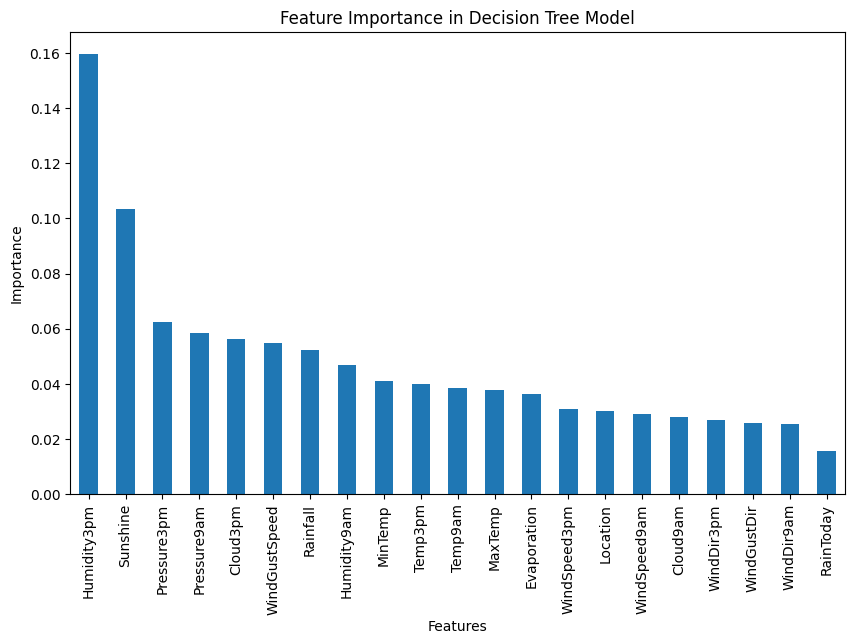

Accuracy: 0.8575


In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier

# 訓練用データを読み込む
uploaded = files.upload()
train_file = 'int_no_loss.csv'
train_data = pd.read_csv(train_file, header=0)


# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
X = train_data[['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストモデルを作成
model = RandomForestClassifier(random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# モデルを保存する
# model_filename = 'int_ptnB_theme2_randomforest_model.joblib'
# joblib.dump(model, model_filename)
# データの保存
# files.download('int_ptnB_theme2_randomforest_model.joblib')

# 特徴量の重要度を取得
importances = model.feature_importances_

# 結果を系列にまとめ、ソートして表示
feature_importance_df = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 結果表示
print("特徴量の重要度:")
print(feature_importance_df)

# 特徴量の重要度をプロット
feature_importance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance in Decision Tree Model')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()


# テストデータでの予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# ランダムフォレストで特徴量調整

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier

# 訓練用データを読み込む
# uploaded = files.upload()
train_file = 'int_no_loss.csv'
train_data = pd.read_csv(train_file, header=0)


# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# Accuracy: 0.8575
# X = train_data[['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday']]
# Accuracy: 0.8575
# X = train_data[['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
# Accuracy: 0.8586
# X = train_data[['MinTemp','MaxTemp','Rainfall','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
# Accuracy: 0.8580
# X = train_data[['MinTemp','Rainfall','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
# Accuracy: 0.8565
# X = train_data[['MinTemp','Rainfall','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm']]
# Accuracy: 0.8367
# X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
# Accuracy: 0.8401
# X = train_data[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Temp9am','Temp3pm']]
# Accuracy: 0.8435
X = train_data[['Location','MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Temp9am','Temp3pm']]
# 10%欠損程度
# Accuracy: 0.8479
#X = train_data[['Location','MinTemp','MaxTemp','Rainfall','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Temp9am','Temp3pm','RainToday']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストモデルを作成
model = RandomForestClassifier(random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# モデルを保存する
# model_filename = 'int_ptnB_theme2_randomforest_model.joblib'
# joblib.dump(model, model_filename)
# データの保存
# files.download('int_ptnB_theme2_randomforest_model.joblib')

# 特徴量の重要度を取得
importances = model.feature_importances_

# 結果を系列にまとめ、ソートして表示
feature_importance_df = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 結果表示
print("特徴量の重要度:")
print(feature_importance_df)

# 特徴量の重要度をプロット
# feature_importance_df.plot(kind='bar', figsize=(10, 6))
# plt.title('Feature Importance in Decision Tree Model')
# plt.ylabel('Importance')
# plt.xlabel('Features')
# plt.show()


# テストデータでの予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

特徴量の重要度:
Humidity3pm      0.221599
WindGustSpeed    0.083977
Humidity9am      0.080861
MinTemp          0.067876
Temp3pm          0.067097
Rainfall         0.064109
MaxTemp          0.062719
Temp9am          0.062251
WindSpeed3pm     0.049100
WindSpeed9am     0.045256
Location         0.043751
WindDir3pm       0.041393
WindGustDir      0.040468
WindDir9am       0.040136
RainToday        0.029407
dtype: float64
Accuracy: 0.8479


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# 訓練用データを読み込む
# uploaded = files.upload()
train_data = pd.read_csv('int_no_loss.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。
# ここでは、'RainTomorrow' が目的変数で、その他が説明変数と仮定しています。

# Accuracy: 0.8336
# X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
X = train_data[['MinTemp','Rainfall','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
y = train_data['RainTomorrow']


# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練データを標準化
# X_train_scaled = scaler.fit_transform(X_train)

# テストデータを標準化（訓練データでフィットしたスケーラーを使用）
# X_test_scaled = scaler.transform(X_test)

# ロジスティック回帰モデルを初期化
model = LogisticRegression(max_iter=5000, random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# テストデータでの予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8478


# 文字列置換_2_方角処理

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# 例としてデータロードとモデル訓練を行います
# uploaded = files.upload()

# CSVファイルをロード
df = pd.read_csv('no_loss.csv', dtype=str)

# 変換ルールを定義
# 分けた方が良さそうだが一旦ひとまとめ
# 16方位は西から東に流れると想定して数値にしている。
# 都市は一旦出てきた順
conversion_map = {
    'Albury': 1,
    'Cobar': 2,
    'CoffsHarbour': 3,
    'Moree': 4,
    'NorfolkIsland': 5,
    'Richmond': 6,
    'Sydney': 7,
    'SydneyAirport': 8,
    'WaggaWagga': 9,
    'Williamtown': 10,
    'Wollongong': 11,
    'Canberra': 12,
    'Ballarat': 13,
    'Bendigo': 14,
    'Sale': 15,
    'MelbourneAirport': 16,
    'Melbourne': 17,
    'Mildura': 18,
    'Portland': 19,
    'Watsonia': 20,
    'Brisbane': 21,
    'Cairns': 22,
    'Townsville': 23,
    'MountGambier': 24,
    'Nuriootpa': 25,
    'Woomera': 26,
    'Albany': 27,
    'PearceRAAF': 28,
    'PerthAirport': 29,
    'Perth': 30,
    'Hobart': 31,
    'Launceston': 32,
    'AliceSprings': 33,
    'Darwin': 34,
    'Katherine': 35,
    'Uluru': 36,
    # 北:N
    'N': 0,
    # 北北東:NNE
    'NNE': 5,
    # 北東:NE
    'NE': 6,
    # 東北東:ENE
    'ENE': 7,
    # 東:E
    'E': 8,
    # 東南東:ESE
    'ESE': 7,
    # 南東:SE
    'SE': 6,
    # 南南東:SSE
    'SSE': 5,
    # 南:S
    'S': 0,
    # 南南西:SSW
    'SSW': 4,
    # 南西:SW
    'SW': 3,
    # 西南西:WSW
    'WSW': 2,
    # 西:W
    'W': 1,
    # 西北西:WNW
    'WNW': 2,
    # 北西:NW
    'NW': 3,
    # 北北西:NNW
    'NNW': 4
}

# 貿易風、偏西風、モンスーンは想定してないので
# 基本は西から東に流れる想定
# 本来北と南は弄った方が良いかもしれないが一旦0にしておく
direction_map = {
    # 北:N
    'N': 0,
    # 北北東:NNE
    'NNE': 5,
    # 北東:NE
    'NE': 6,
    # 東北東:ENE
    'ENE': 7,
    # 東:E
    'E': 8,
    # 東南東:ESE
    'ESE': 7,
    # 南東:SE
    'SE': 6,
    # 南南東:SSE
    'SSE': 5,
    # 南:S
    'S': 0,
    # 南南西:SSW
    'SSW': 4,
    # 南西:SW
    'SW': 3,
    # 西南西:WSW
    'WSW': 2,
    # 西:W
    'W': 1,
    # 西北西:WNW
    'WNW': 2,
    # 北西:NW
    'NW': 3,
    # 北北西:NNW
    'NNW': 4
}


# 3カラム目（通常はインデックス2）を条件に基づいて変換
column_index = 2  # ここを変えれば別のカラムを指定できます

def convert_value(value):
    try:
        # もともと数字の場合はそのまま返す
        return int(value)
    except ValueError:
        # 変換マップで指定されている値ならマップの値を、それ以外なら52を返す
        # 変換外の異常値はWindDir3pmも連番と考えた場合の範囲外値
        return conversion_map.get(value, 52)

# 3カラム目と8カラム目のみに変換を適用する
columns_to_convert = [2, 8,10,11]

for index in columns_to_convert:
    df.iloc[:, index] = df.iloc[:, index].apply(convert_value)


# RainTodayを0,1変換
df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)

# 変換後のデータフレームを表示
# print(df)

# 必要に応じて、新しいCSVファイルに保存
df.to_csv('new_int_no_loss.csv', index=False)
files.download('new_int_no_loss.csv')

<ipython-input-5-64bc5f96c024>:147: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# モデル再検討_2

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files


# 訓練用データを読み込む
# uploaded = files.upload()
train_data = pd.read_csv('new_int_no_loss.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。
# ここでは、'RainTomorrow' が目的変数で、その他が説明変数と仮定しています。

# Accuracy: 0.8575
# X = train_data[['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday']]
# X = data[['Location','Rainfall','Humidity3pm','Pressure3pm','Temp3pm']]
X = data[['Rainfall','Humidity3pm','Pressure3pm','Temp3pm']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# モデルを定義
models = {
    # "Decision Tree": DecisionTreeClassifier(random_state=42),
    # "Decision Tree none": DecisionTreeClassifier(random_state=42),
    # "Decision Tree 3": DecisionTreeClassifier(max_depth=3,random_state=42),
    # "Decision Tree 5": DecisionTreeClassifier(max_depth=5,random_state=42),
    # "Decision Tree 10": DecisionTreeClassifier(max_depth=10,random_state=42),
    "Random Forest depth none": RandomForestClassifier(random_state=42),
    "Random Forest depth 3": RandomForestClassifier(max_depth=3,random_state=42),
    "Random Forest depth 5": RandomForestClassifier(max_depth=5,random_state=42),
    "Random Forest depth 10": RandomForestClassifier(max_depth=10,random_state=42),
    "Random Forest depth 15": RandomForestClassifier(max_depth=15,random_state=42),
    "Random Forest depth 20": RandomForestClassifier(max_depth=20,random_state=42),
    "Random Forest depth 25": RandomForestClassifier(max_depth=25,random_state=42),
    # "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    # "Support Vector Machine": SVC(random_state=42),
}

# 各モデルの精度を計算
results = {}
for name, model in models.items():
    print(f"Evaluating {name}...")
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = np.mean(scores)
    print(f"{name}: Average Accuracy = {results[name]:.4f}")

# 結果を表示
print("\nModel Comparison:")
for name in results:
    print(f"{name}: {results[name]:.4f}")

Evaluating Random Forest depth none...
Random Forest depth none: Average Accuracy = 0.8328
Evaluating Random Forest depth 3...
Random Forest depth 3: Average Accuracy = 0.8389
Evaluating Random Forest depth 5...
Random Forest depth 5: Average Accuracy = 0.8435
Evaluating Random Forest depth 10...
Random Forest depth 10: Average Accuracy = 0.8443
Evaluating Random Forest depth 15...
Random Forest depth 15: Average Accuracy = 0.8393
Evaluating Random Forest depth 20...
Random Forest depth 20: Average Accuracy = 0.8358
Evaluating Random Forest depth 25...
Random Forest depth 25: Average Accuracy = 0.8335

Model Comparison:
Random Forest depth none: 0.8328
Random Forest depth 3: 0.8389
Random Forest depth 5: 0.8435
Random Forest depth 10: 0.8443
Random Forest depth 15: 0.8393
Random Forest depth 20: 0.8358
Random Forest depth 25: 0.8335


# ランダムフォレストの特徴量再調査

Saving date_chg_int_new_int_no_loss.csv to date_chg_int_new_int_no_loss (2).csv
特徴量の重要度:
Humidity3pm    0.442089
Rainfall       0.150597
Humidity9am    0.094978
Temp3pm        0.072049
MinTemp        0.063496
Temp9am        0.050148
MaxTemp        0.048814
Date           0.045573
Location       0.032254
dtype: float64


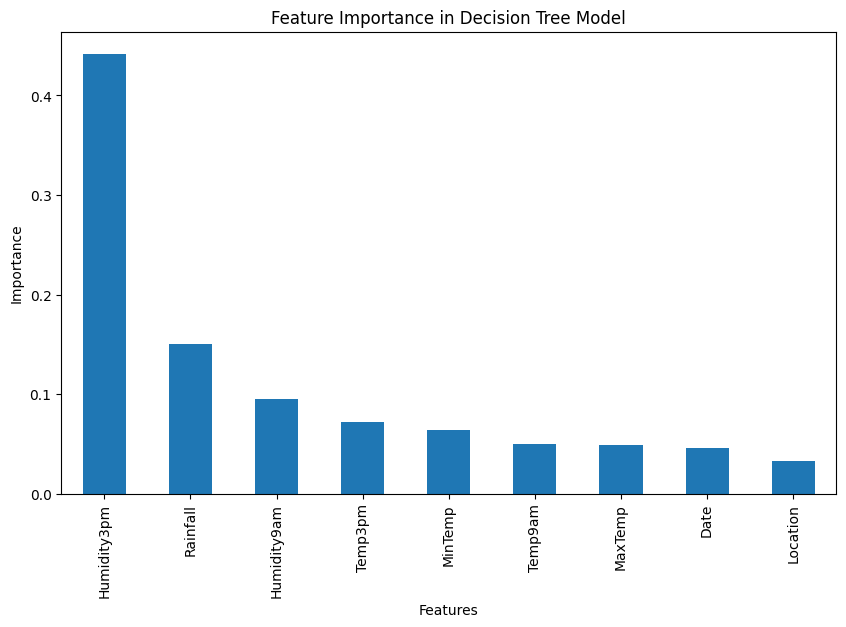

Accuracy: 0.8495


In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier

# 訓練用データを読み込む
uploaded = files.upload()
train_file = 'date_chg_int_new_int_no_loss.csv'
train_data = pd.read_csv(train_file, header=0)


# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# Accuracy: 0.8580
# X = train_data[['Date','Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday']]
# Accuracy: 0.8575
# X = train_data[['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
# Accuracy: 0.8586
# X = train_data[['MinTemp','MaxTemp','Rainfall','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
# Accuracy: 0.8580
# X = train_data[['MinTemp','Rainfall','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
# Accuracy: 0.8565
# X = train_data[['MinTemp','Rainfall','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm']]
# Accuracy: 0.8367
# X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
# Accuracy: 0.8401
# X = train_data[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Temp9am','Temp3pm']]
# Accuracy: 0.8435
# X = train_data[['Location','MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Temp9am','Temp3pm']]
# 10%欠損程度
# Accuracy: 0.8479
# new_int test_size0.1
# Accuracy: 0.8557
# X = train_data[['Location','MinTemp','MaxTemp','Rainfall','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Temp9am','Temp3pm','RainToday']]
# ptnC,test_size0.1
# Accuracy: 0.8457
# ptnC,test_size0.2
# Accuracy: 0.8490
# X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
# Accuracy: 0.8383 test_size0.2
# Accuracy: 0.8490 test_size0.1
X = train_data[['Date','Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
# ------- ここから場所とか日付とかで色々弄る(test_sizeは0.2)--------
# locaton 2のみのデータ
# Accuracy: 0.8308
# X = train_data[['Date','MinTemp','MaxTemp','Rainfall','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Temp9am','Temp3pm','RainToday']]
# ---- 月縛り----
# 1月only
# Accuracy: 0.8726
# X = train_data[['Location','MinTemp','MaxTemp','Rainfall','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Temp9am','Temp3pm','RainToday']]
# Accuracy: 0.8774
# X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
# ----年縛り-----
# 2013年
# Accuracy: 0.8355
#X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
# 欠損500以下
# X = train_data[['Date','Location','MinTemp','MaxTemp','Rainfall','WindSpeed9am','WindSpeed3pm','Humidity9am','Temp9am','Temp3pm','RainToday']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ランダムフォレストモデルを作成
model = RandomForestClassifier(max_depth=10,random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# モデルを保存する
# model_filename = 'int_ptnB_theme2_randomforest_model.joblib'
# joblib.dump(model, model_filename)
# データの保存
# files.download('int_ptnB_theme2_randomforest_model.joblib')

# 特徴量の重要度を取得
importances = model.feature_importances_

# 結果を系列にまとめ、ソートして表示
feature_importance_df = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 結果表示
print("特徴量の重要度:")
print(feature_importance_df)

# 特徴量の重要度をプロット
feature_importance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance in Decision Tree Model')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()


# テストデータでの予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


# 訓練用データを読み込む
uploaded = files.upload()
train_file = 'new_int_no_loss.csv'
train_data = pd.read_csv(train_file, header=0)


# 必要に応じてデータを前処理（カテゴリ変数を数値化）
train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']


# ランダムフォレストモデルの作成
model = RandomForestClassifier(n_estimators=100, random_state=42)

# モデルを保存する
model_filename = 'cross_K-fold5_ptnC_theme2_randomforest_model.joblib'
joblib.dump(model, model_filename)
# データの保存
files.download('cross_K-fold5_ptnC_theme2_randomforest_model.joblib')

# Stratified K-Foldを構成
kf = StratifiedKFold(n_splits=5)

# クロスバリデーションを使用してモデルの評価
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# 結果の表示
print(f'Cross-Validation Accuracy Scores: {scores}')
print(f'Mean Accuracy: {scores.mean():.4f}, Std: {scores.std():.4f}')

Saving new_int_no_loss.csv to new_int_no_loss (3).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Cross-Validation Accuracy Scores: [0.27978126 0.83207687 0.70716925 0.83769401 0.83872875]
Mean Accuracy: 0.6991, Std: 0.2155


# testデータ加工_地域変換

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# 例としてデータロードとモデル訓練を行います
uploaded = files.upload()

# CSVファイルをロード
df = pd.read_csv('ext_12gatu_test.csv', dtype=str)

# 変換ルールを定義
# 分けた方が良さそうだが一旦ひとまとめ
conversion_map = {
    'Albury': 1,
    'Cobar': 2,
    'CoffsHarbour': 3,
    'Moree': 4,
    'NorfolkIsland': 5,
    'Richmond': 6,
    'Sydney': 7,
    'SydneyAirport': 8,
    'WaggaWagga': 9,
    'Williamtown': 10,
    'Wollongong': 11,
    'Canberra': 12,
    'Ballarat': 13,
    'Bendigo': 14,
    'Sale': 15,
    'MelbourneAirport': 16,
    'Melbourne': 17,
    'Mildura': 18,
    'Portland': 19,
    'Watsonia': 20,
    'Brisbane': 21,
    'Cairns': 22,
    'Townsville': 23,
    'MountGambier': 24,
    'Nuriootpa': 25,
    'Woomera': 26,
    'Albany': 27,
    'PearceRAAF': 28,
    'PerthAirport': 29,
    'Perth': 30,
    'Hobart': 31,
    'Launceston': 32,
    'AliceSprings': 33,
    'Darwin': 34,
    'Katherine': 35,
    'Uluru': 36,
    # --- データ欠損見て追加 ---
    'BadgerysCreek': 37,
    'Newcastle': 38,
    'NorahHead': 39,
    'Penrith': 40,
    'Tuggeranong': 41,
    'MountGinini': 42,
    'Nhil': 43,
    'Dartmoor': 44,
    'GoldCoast': 45,
    'Adelaide': 46,
    'Witchcliffe': 47,
    'SalmonGums': 48,
    'Walpole': 49,
}



# 3カラム目（通常はインデックス2）を条件に基づいて変換
column_index = 2  # ここを変えれば別のカラムを指定できます

def convert_value(value):
    try:
        # もともと数字の場合はそのまま返す
        return int(value)
    except ValueError:
        # 変換マップで指定されている値ならマップの値を、それ以外なら52を返す
        # 変換外の異常値はWindDir3pmも連番と考えた場合の範囲外値
        return conversion_map.get(value, 52)

# 2カラム目のみに変換を適用する
columns_to_convert = [2]

for index in columns_to_convert:
    df.iloc[:, index] = df.iloc[:, index].apply(convert_value)


# RainTodayを0,1変換
# df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)

# 変換後のデータフレームを表示
# print(df)

# 必要に応じて、新しいCSVファイルに保存
df.to_csv('int_12gatu_test.csv', index=False)
files.download('int_12gatu_test.csv')

Saving ext_12gatu_test.csv to ext_12gatu_test.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 深層学習

In [ ]:
# !pip install pandas scikit-learn tensorflow
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU

# データの読み込み
# uploaded = files.upload()
data = pd.read_csv('date_chg_int_new_int_no_loss.csv')

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を指定
# test_size_0.2 Test Accuracy: 0.8361
# epoh 25 test_size=0.1 Test Accuracy: 0.8407
# X = data[['Date', 'Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
# epoh 25 test_size=0.1  Test Accuracy: 0.8643
# epoh 15 test_size=0.1  Test Accuracy: 0.8646
# epoh 15 test_size=0.1 Dense128/64 Test Accuracy: 0.8605
# X = data[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
# epoh 15 test_size=0.1 Dense64/32 Test Accuracy: 0.8620
# X = data[['MinTemp','MaxTemp','Rainfall','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]
# Test Accuracy: 0.8578
# X = data[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]
# Test Accuracy: 0.8560
# X = data[['Date', 'Location','MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]
# Test Accuracy: 0.8537
# X = data[['Date', 'MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]
# Test Accuracy: 0.8555
# X = data[['Location','MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]
# Test Accuracy: 0.8599
# X = data[['MinTemp','MaxTemp','Rainfall','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]
# epochs=15 Test Accuracy: 0.8581
# X = data[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
# epoh 15 test_size=0.1  Test Accuracy: Test Accuracy: 0.8646
# X = data[['Date', 'Location', 'MinTemp','MaxTemp','Rainfall','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
# Test Accuracy: 0.8549
# X = data[['Location','Rainfall','Humidity3pm','Pressure3pm','Temp3pm']]
# X = data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
X = train_data[['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
y = data['RainTomorrow']


# カテゴリ変数のエンコード
# encoder = LabelEncoder()
# X['Location'] = encoder.fit_transform(X['Location'])

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 二値目的変数のエンコード
# y_encoded = encoder.fit_transform(y)
# y_categorical = np_utils.to_categorical(y_encoded)  # yをone-hotエンコーディング

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# one-hotエンコーディングの適用
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# print("----")
# print(y_train.shape)

# モデルの構築
# epoh 25 test_size=0.1  Test Accuracy: 0.8643
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))
# model = Sequential()
# Test Accuracy: 0.8537
# model.add(Input(shape=(X_train.shape[1],)))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(y_train.shape[1], activation='softmax'))
# 128/64 Test Accuracy: 0.8528
# 64/32  Test Accuracy: 0.8519
# model.add(Input(shape=(X_train.shape[1],)))
# model.add(Dense(64))
# model.add(LeakyReLU(alpha=0.0))  # alphaは負の部分の勾配の割合を表します
# model.add(Dense(32))
# model.add(LeakyReLU(alpha=0.01))
# model.add(Dense(y_train.shape[1], activation='softmax'))

# モデルのコンパイル
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# モデルの訓練
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.1, verbose=1)

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


857/857 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8288 - loss: 0.4192 - val_accuracy: 0.8479 - val_loss: 0.3737
Epoch 2/15
857/857 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8396 - loss: 0.3945 - val_accuracy: 0.8493 - val_loss: 0.3739
Epoch 3/15
857/857 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8396 - loss: 0.3903 - val_accuracy: 0.8430 - val_loss: 0.3831
Epoch 4/15
857/857 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8402 - loss: 0.3913 - val_accuracy: 0.8450 - val_loss: 0.3776
Epoch 5/15
857/857 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8395 - loss: 0.3864 - val_accuracy: 0.8420 - val_loss: 0.3792
Epoch 6/15
857/857 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8417 - loss: 0.3839 - val_accuracy: 0.8460 - val_loss: 0.3742
Epoch 7/15
857/857 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8384 - loss: 0.3902 - val_accuracy: 0.8466 - val_loss: 0.3759
Epoch 8/15
857/857 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8386 - loss: 0.3895 - val_accuracy: 0.8486 - val_

# 深層学習_r2

In [ ]:
# !pip install pandas scikit-learn tensorflow
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# データの読み込み
# uploaded = files.upload()
data = pd.read_csv('date_chg_int_new_int_no_loss.csv')
# data = pd.read_csv('kakou_all_int_train.csv')
# 必要に応じてデータを前処理（カテゴリ変数を数値化）
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を指定
X = data[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
y = data['RainTomorrow']


# カテゴリ変数のエンコード
# encoder = LabelEncoder()
# X['Location'] = encoder.fit_transform(X['Location'])

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 二値目的変数のエンコード
# y_encoded = encoder.fit_transform(y)
# y_categorical = np_utils.to_categorical(y_encoded)  # yをone-hotエンコーディング

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# one-hotエンコーディングの適用
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# print("----")
# print(y_train.shape)

# モデルの構築
# 1024_relu/512_relu/softmax/20/256/0.1 Test Accuracy: 0.8602
# 512_relu/256_relu/softmax/20/128/0.1 Test Accuracy: 0.8634
# 512_relu/256_relu/softmax/15/128/0.1 Test Accuracy: 0.8593
# 512_relu/512_relu/softmax/15/512/0.1 Test Accuracy: 0.8620
model = Sequential()
# model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(y_train.shape[1], activation='softmax'))

# model.add(Dropout(0.3))TTest Accuracy: 0.8584
# model.add(Dropout(0.1))Test Accuracy: 0.8578
# drop無し: Test Accuracy: 0.8572

# 3層1024/512/256 Dropout 0.3
# model.add(Dense(1024, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで10%のユニットをランダムに無効化

# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.3))  # ドロップアウトで10%のユニットをランダムに無効化

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで10%のユニットをランダムに無効化

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで10%のユニットをランダムに無効化

# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.3))  # ドロップアウトで10%のユニットをランダムに無効化

model.add(Dense(y_train.shape[1], activation='softmax'))

# モデルのコンパイル
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# モデルの訓練
model.fit(X_train, y_train, epochs=25, batch_size=128, validation_split=0.1, verbose=1)

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8216 - loss: 0.3987 - val_accuracy: 0.8496 - val_loss: 0.3400
Epoch 2/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8547 - loss: 0.3501 - val_accuracy: 0.8499 - val_loss: 0.3355
Epoch 3/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8521 - loss: 0.3487 - val_accuracy: 0.8558 - val_loss: 0.3307
Epoch 4/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8558 - loss: 0.3421 - val_accuracy: 0.8479 - val_loss: 0.3339
Epoch 5/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8577 - loss: 0.3335 - val_accuracy: 0.8502 - val_loss: 0.3312
Epoch 6/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8589 - loss: 0.3363 - val_accuracy: 0.8562 - val_loss: 0.3286
Epoch 7/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8506 - loss: 0.3421 - val_accuracy: 0.8509 - val_loss: 0.3304
Epoch 8/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8549 - loss: 0.3405 - val_accuracy: 0.8473 - v

# 深層学習_r3

In [ ]:
# !pip install pandas scikit-learn tensorflow
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# データの読み込み
# uploaded = files.upload()
data = pd.read_csv('date_chg_int_new_int_no_loss.csv')
# data = pd.read_csv('kakou_all_int_train.csv')
# 必要に応じてデータを前処理（カテゴリ変数を数値化）
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を指定
X = data[['Humidity3pm','Sunshine','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp', 'Evaporation', 'WindSpeed3pm']]
# X = data[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
# X = data[['Humidity3pm','Sunshine','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp', 'Evaporation', 'WindSpeed3pm']]
# X = data[['Humidity3pm','Sunshine','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp', 'WindSpeed3pm']]
# X = data[['Humidity3pm','Sunshine','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp']]
# X = data[['Humidity3pm','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp', 'WindSpeed3pm']]
y = data['RainTomorrow']


# カテゴリ変数のエンコード
# encoder = LabelEncoder()
# X['Location'] = encoder.fit_transform(X['Location'])

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 二値目的変数のエンコード
# y_encoded = encoder.fit_transform(y)
# y_categorical = np_utils.to_categorical(y_encoded)  # yをone-hotエンコーディング

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# one-hotエンコーディングの適用
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# print("----")
# print(y_train.shape)

# モデルの構築
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(y_train.shape[1], activation='softmax'))

# モデルのコンパイル
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# モデルの訓練
model.fit(X_train, y_train, epochs=25, batch_size=128, validation_split=0.1, verbose=1)
# モデルの保存
model.save('512_256_128_softmax_ep25_ba128.h5')

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8245 - loss: 0.3932 - val_accuracy: 0.8519 - val_loss: 0.3273
Epoch 2/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8544 - loss: 0.3379 - val_accuracy: 0.8512 - val_loss: 0.3254
Epoch 3/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8552 - loss: 0.3326 - val_accuracy: 0.8499 - val_loss: 0.3206
Epoch 4/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8571 - loss: 0.3325 - val_accuracy: 0.8512 - val_loss: 0.3225
Epoch 5/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8607 - loss: 0.3267 - val_accuracy: 0.8542 - val_loss: 0.3205
Epoch 6/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8591 - loss: 0.3295 - val_accuracy: 0.8512 - val_loss: 0.3280
Epoch 7/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8596 - loss: 0.3262 - val_accuracy: 0.8516 - val_loss: 0.3204
Epoch 8/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8648 - loss: 0.3143 - val_accuracy: 0.8585 - v

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8648 - loss: 0.3145
Test Accuracy: 0.8623


# 深層学習_r4 sigmoid

In [ ]:
# !pip install pandas scikit-learn tensorflow
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# データの読み込み
uploaded = files.upload()
data = pd.read_csv('date_chg_int_new_int_no_loss.csv')
# 必要に応じてデータを前処理（カテゴリ変数を数値化）
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を指定
X = data[['Humidity3pm','Sunshine','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp', 'Evaporation', 'WindSpeed3pm']]
y = data['RainTomorrow']


# カテゴリ変数のエンコード
# encoder = LabelEncoder()
# X['Location'] = encoder.fit_transform(X['Location'])

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 二値目的変数のエンコード
# y_encoded = encoder.fit_transform(y)
# y_categorical = np_utils.to_categorical(y_encoded)  # yをone-hotエンコーディング

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# one-hotエンコーディングの適用
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# モデルの構築
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(y_train.shape[1], activation='sigmoid'))

# モデルのコンパイル
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# モデルの訓練
model.fit(X_train, y_train, epochs=25, batch_size=128, validation_split=0.1, verbose=1)
# モデルの保存
model.save('512_256_128_sigmoid_ep25_ba128.h5')

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Saving date_chg_int_new_int_no_loss.csv to date_chg_int_new_int_no_loss (1).csv


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.8296 - loss: 0.3857 - val_accuracy: 0.8516 - val_loss: 0.3298
Epoch 2/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.8563 - loss: 0.3404 - val_accuracy: 0.8552 - val_loss: 0.3246
Epoch 3/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8553 - loss: 0.3340 - val_accuracy: 0.8552 - val_loss: 0.3227
Epoch 4/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.8579 - loss: 0.3303 - val_accuracy: 0.8575 - val_loss: 0.3206
Epoch 5/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.8571 - loss: 0.3263 - val_accuracy: 0.8568 - val_loss: 0.3208
Epoch 6/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.8573 - loss: 0.3292 - val_accuracy: 0.8479 - val_loss: 0.3234
Epoch 7/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.8546 - loss: 0.3319 - val_accuracy: 0.8519 - val_loss: 0.3204
Epoch 8/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8557 - loss: 0.3302 - val_accu

106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8653 - loss: 0.3171
Test Accuracy: 0.8646


# 深層学習 LeakyReLU

In [ ]:
# !pip install pandas scikit-learn tensorflow
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# データの読み込み
# uploaded = files.upload()
data = pd.read_csv('date_chg_int_new_int_no_loss.csv')
# data = pd.read_csv('kakou_all_int_train.csv')
# 必要に応じてデータを前処理（カテゴリ変数を数値化）
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を指定
X = data[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
y = data['RainTomorrow']


# カテゴリ変数のエンコード
# encoder = LabelEncoder()
# X['Location'] = encoder.fit_transform(X['Location'])

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 二値目的変数のエンコード
# y_encoded = encoder.fit_transform(y)
# y_categorical = np_utils.to_categorical(y_encoded)  # yをone-hotエンコーディング

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# one-hotエンコーディングの適用
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# print("----")
# print(y_train.shape)

# モデルの構築
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1]))
model.add(LeakyReLU(alpha=0.1))  # Leaky ReLU を適用
model.add(Dropout(0.3))  # ドロップアウトで10%のユニットをランダムに無効化


model.add(Dense(256))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))  # ドロップアウトで10%のユニットをランダムに無効化

model.add(Dense(128))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.3))  # ドロップアウトで10%のユニットをランダムに無効化


model.add(Dense(y_train.shape[1], activation='softmax'))

# モデルのコンパイル
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# モデルの訓練
model.fit(X_train, y_train, epochs=25, batch_size=128, validation_split=0.1, verbose=1)

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.8203 - loss: 0.3993 - val_accuracy: 0.8509 - val_loss: 0.3371
Epoch 2/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8549 - loss: 0.3421 - val_accuracy: 0.8483 - val_loss: 0.3397
Epoch 3/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.8569 - loss: 0.3432 - val_accuracy: 0.8542 - val_loss: 0.3302
Epoch 4/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8530 - loss: 0.3419 - val_accuracy: 0.8542 - val_loss: 0.3302
Epoch 5/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8565 - loss: 0.3386 - val_accuracy: 0.8535 - val_loss: 0.3320
Epoch 6/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8543 - loss: 0.3411 - val_accuracy: 0.8519 - val_loss: 0.3335
Epoch 7/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8557 - loss: 0.3392 - val_accuracy: 0.8535 - val_loss: 0.3325
Epoch 8/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8582 - loss: 0.3374 - val_accura

# r3_trainデータ加工_文字列変換

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# 例としてデータロードとモデル訓練を行います
uploaded = files.upload()

# CSVファイルをロード
df = pd.read_csv('train.csv', dtype=str)

# 変換ルールを定義
# 分けた方が良さそうだが一旦ひとまとめ
# 16方位は西から東に流れると想定して数値にしている。
# 都市は一旦出てきた順
conversion_map = {
    'Albury': 1,
    'Cobar': 2,
    'CoffsHarbour': 3,
    'Moree': 4,
    'NorfolkIsland': 5,
    'Richmond': 6,
    'Sydney': 7,
    'SydneyAirport': 8,
    'WaggaWagga': 9,
    'Williamtown': 10,
    'Wollongong': 11,
    'Canberra': 12,
    'Ballarat': 13,
    'Bendigo': 14,
    'Sale': 15,
    'MelbourneAirport': 16,
    'Melbourne': 17,
    'Mildura': 18,
    'Portland': 19,
    'Watsonia': 20,
    'Brisbane': 21,
    'Cairns': 22,
    'Townsville': 23,
    'MountGambier': 24,
    'Nuriootpa': 25,
    'Woomera': 26,
    'Albany': 27,
    'PearceRAAF': 28,
    'PerthAirport': 29,
    'Perth': 30,
    'Hobart': 31,
    'Launceston': 32,
    'AliceSprings': 33,
    'Darwin': 34,
    'Katherine': 35,
    'Uluru': 36,
    # --- データ欠損見て追加 ---
    'BadgerysCreek': 37,
    'Newcastle': 38,
    'NorahHead': 39,
    'Penrith': 40,
    'Tuggeranong': 41,
    'MountGinini': 42,
    'Nhil': 43,
    'Dartmoor': 44,
    'GoldCoast': 45,
    'Adelaide': 46,
    'Witchcliffe': 47,
    'SalmonGums': 48,
    'Walpole': 49,
    # 北:N
    'N': 0,
    # 北北東:NNE
    'NNE': 5,
    # 北東:NE
    'NE': 6,
    # 東北東:ENE
    'ENE': 7,
    # 東:E
    'E': 8,
    # 東南東:ESE
    'ESE': 7,
    # 南東:SE
    'SE': 6,
    # 南南東:SSE
    'SSE': 5,
    # 南:S
    'S': 0,
    # 南南西:SSW
    'SSW': 4,
    # 南西:SW
    'SW': 3,
    # 西南西:WSW
    'WSW': 2,
    # 西:W
    'W': 1,
    # 西北西:WNW
    'WNW': 2,
    # 北西:NW
    'NW': 3,
    # 北北西:NNW
    'NNW': 4
}

# 貿易風、偏西風、モンスーンは想定してないので
# 基本は西から東に流れる想定
# 本来北と南は弄った方が良いかもしれないが一旦0にしておく
direction_map = {
    # 北:N
    'N': 0,
    # 北北東:NNE
    'NNE': 5,
    # 北東:NE
    'NE': 6,
    # 東北東:ENE
    'ENE': 7,
    # 東:E
    'E': 8,
    # 東南東:ESE
    'ESE': 7,
    # 南東:SE
    'SE': 6,
    # 南南東:SSE
    'SSE': 5,
    # 南:S
    'S': 0,
    # 南南西:SSW
    'SSW': 4,
    # 南西:SW
    'SW': 3,
    # 西南西:WSW
    'WSW': 2,
    # 西:W
    'W': 1,
    # 西北西:WNW
    'WNW': 2,
    # 北西:NW
    'NW': 3,
    # 北北西:NNW
    'NNW': 4
}


# 3カラム目（通常はインデックス2）を条件に基づいて変換
column_index = 2  # ここを変えれば別のカラムを指定できます

def convert_value(value):
    try:
        # もともと数字の場合はそのまま返す
        return int(value)
    except ValueError:
        # 変換マップで指定されている値ならマップの値を、それ以外なら52を返す
        # 変換外の異常値はWindDir3pmも連番と考えた場合の範囲外値
        return conversion_map.get(value, 52)

# 3カラム目と8カラム目のみに変換を適用する
columns_to_convert = [2, 8,10,11]

for index in columns_to_convert:
    df.iloc[:, index] = df.iloc[:, index].apply(convert_value)


# RainTodayを0,1変換
df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)

# 変換後のデータフレームを表示
# print(df)

# 必要に応じて、新しいCSVファイルに保存
df.to_csv('all_int_train.csv', index=False)
files.download('all_int_train.csv')

Saving train.csv to train.csv


<ipython-input-5-a6a6c833cdd0>:161: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ヒートマップ

Saving kakou_all_int_train.csv to kakou_all_int_train.csv
---a----
    Date  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  39783         1     13.4     22.9       0.6          NaN       NaN   
1  39784         1      7.4     25.1       0.0          NaN       NaN   
2  39787         1     17.5     32.3       1.0          NaN       NaN   
3  39788         1     14.6     29.7       0.2          NaN       NaN   
4  39789         1     14.3     25.0       0.0          NaN       NaN   

   WindGustDir  WindGustSpeed  WindDir9am  ...  Humidity9am  Humidity3pm  \
0            1           44.0           1  ...         71.0         22.0   
1            2           44.0           4  ...         44.0         25.0   
2            1           41.0           7  ...         82.0         33.0   
3            2           56.0           1  ...         55.0         23.0   
4            1           50.0           3  ...         49.0         19.0   

   Pressure9am  Pressure3pm  Cloud9am

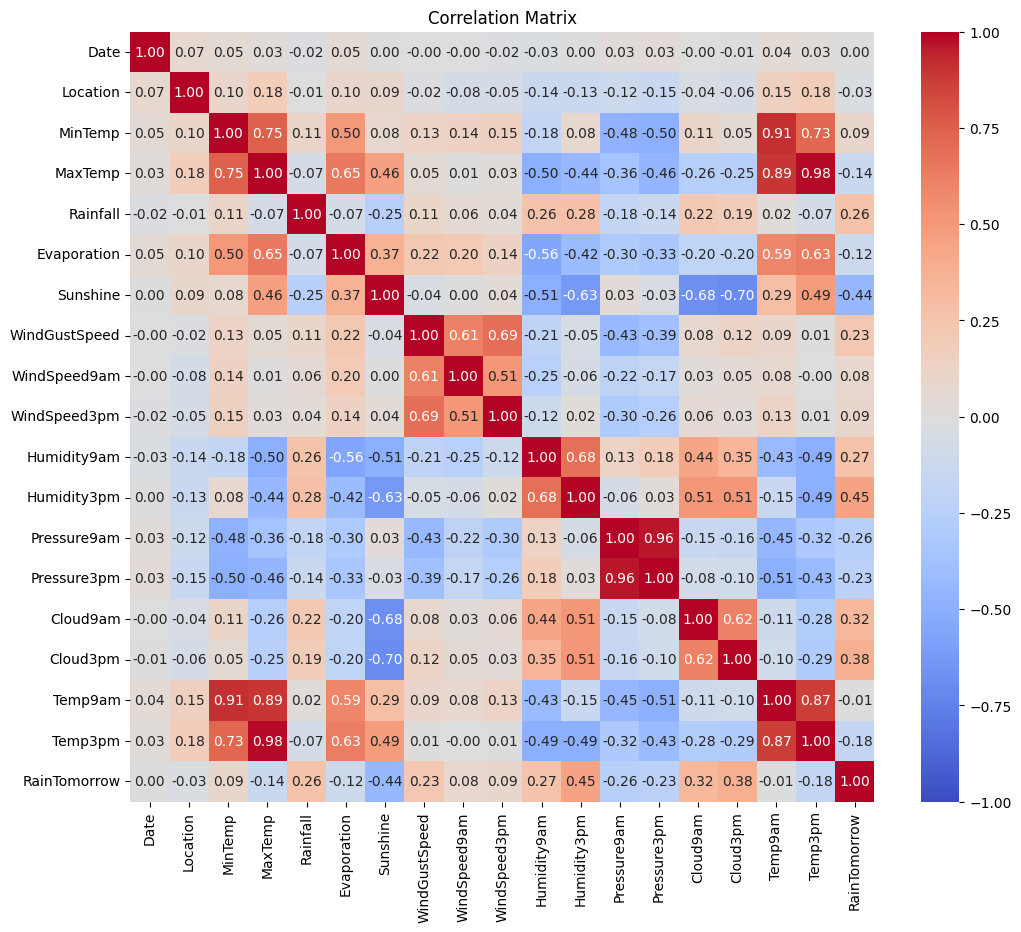

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# CSVファイルを読み込む
uploaded = files.upload()
data_base = pd.read_csv('kakou_all_int_train.csv')

# データの欠損値を確認（欠損値があると相関計算に影響するので、適切に処理する必要があります）
# 簡便のために、ここではdropnaを使って欠損値を含む行を削除しますが、他の方法（補間や別処置）もあります
print("---a----")
print(data_base.head())
# X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
data = data_base[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
                  'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow']]
print("-b---")
print(data.head())
data_cleaned = data.dropna()

print("--c--")
print(data_cleaned.head())
# 説明変数のみで相関を計算し、目的変数「RainTomorrow」との相関を見ます
correlation_matrix = data_cleaned.corr()

# 目的変数との相関を取得
correlation_with_target = correlation_matrix['RainTomorrow'].drop('RainTomorrow').sort_values(ascending=False)

# 相関が強い順に表示
print("目的変数 'RainTomorrow' との相関が強い説明変数:")
print(correlation_with_target)

# 相関行列のヒートマップを描画する
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# 深層学習モデル用のtestデータ加工(SimpleImputer)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# データの読み込み
# uploaded = files.upload()
df = pd.read_csv('softmax_test.csv')

# SimpleImputerのインスタンスを作成（この例では列の平均で補完）
imputer = SimpleImputer(strategy='mean')

# 補完を適用
# 数値データが対象となるため、数値列のみを取得
numeric_cols = df.select_dtypes(include=[np.number]).columns
imputed_data = imputer.fit_transform(df[numeric_cols])

# 小数第1位以降を切り捨て
imputed_data_truncated = np.floor(imputed_data * 10) / 10

# 補完したデータを新しいデータフレームに挿入
df[numeric_cols] = imputed_data_truncated

# 補完後のデータを新しいCSVファイルとして保存
df.to_csv('softmax_test_imputed.csv', index=False)

# ダウンロードする
files.download('softmax_test_imputed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 全trainでもデータ加工しておく(検証用)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from google.colab import files

# データの読み込み
uploaded = files.upload()
df = pd.read_csv('softmax_train.csv')

# SimpleImputerのインスタンスを作成（この例では列の平均で補完）
imputer = SimpleImputer(strategy='mean')

# 補完を適用
# 数値データが対象となるため、数値列のみを取得
numeric_cols = df.select_dtypes(include=[np.number]).columns
imputed_data = imputer.fit_transform(df[numeric_cols])

# 小数第1位以降を切り捨て
imputed_data_truncated = np.floor(imputed_data * 10) / 10

# 補完したデータを新しいデータフレームに挿入
df[numeric_cols] = imputed_data_truncated

# 補完後のデータを新しいCSVファイルとして保存
df.to_csv('softmax_train_imputed.csv', index=False)

# ダウンロードする
files.download('softmax_train_imputed.csv')

Saving softmax_train.csv to softmax_train.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# SimpleImputer後のtrainデータで深層学習どうなる

In [ ]:
# !pip install pandas scikit-learn tensorflow
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# データの読み込み
# uploaded = files.upload()
# data = pd.read_csv('date_chg_int_new_int_no_loss.csv')
# data = pd.read_csv('softmax_train_imputed.csv')
data = pd.read_csv('float_train_imputed.csv')
# 必要に応じてデータを前処理（カテゴリ変数を数値化）
data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を指定
# X = data[['Humidity3pm','Sunshine','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp', 'Evaporation', 'WindSpeed3pm']]
X = data[['Humidity3pm','Sunshine','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp', 'Evaporation', 'WindSpeed3pm']]
# X = data[['MinTemp','MaxTemp','Rainfall','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud3pm','Temp9am','Temp3pm']]
# X = data[['Humidity3pm','Sunshine','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp', 'Evaporation', 'WindSpeed3pm']]
# X = data[['Humidity3pm','Sunshine','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp', 'WindSpeed3pm']]
# X = data[['Humidity3pm','Sunshine','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp']]
# X = data[['Humidity3pm','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp', 'WindSpeed3pm']]
y = data['RainTomorrow']


# カテゴリ変数のエンコード
# encoder = LabelEncoder()
# X['Location'] = encoder.fit_transform(X['Location'])

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 二値目的変数のエンコード
# y_encoded = encoder.fit_transform(y)
# y_categorical = np_utils.to_categorical(y_encoded)  # yをone-hotエンコーディング

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# one-hotエンコーディングの適用
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# print("----")
# print(y_train.shape)

# モデルの構築
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(y_train.shape[1], activation='softmax'))

# モデルのコンパイル
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# モデルの訓練
model.fit(X_train, y_train, epochs=25, batch_size=128, validation_split=0.1, verbose=1)
# モデルの保存
# model.save('softmax_train_imputed_512_256_128_softmax_ep25_ba128.h5')

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.8291 - loss: 0.3969 - val_accuracy: 0.8526 - val_loss: 0.3523
Epoch 2/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.8477 - loss: 0.3560 - val_accuracy: 0.8528 - val_loss: 0.3473
Epoch 3/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.8477 - loss: 0.3561 - val_accuracy: 0.8525 - val_loss: 0.3438
Epoch 4/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.8491 - loss: 0.3518 - val_accuracy: 0.8529 - val_loss: 0.3425
Epoch 5/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.8518 - loss: 0.3471 - val_accuracy: 0.8566 - val_loss: 0.3414
Epoch 6/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8490 - loss: 0.3492 - val_accuracy: 0.8557 - val_loss: 0.3412
Epoch 7/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.8513 - loss: 0.3490 - val_accuracy: 0.8570 - val_loss: 0.3430
Epoch 8/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.8489 - loss: 0.3493 - va

264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8585 - loss: 0.3372
Test Accuracy: 0.8537


# 機械学習でtestデータ評価

In [ ]:
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam



# CSVファイルからデータを読み込む
uploaded = files.upload()

# softmaxでやるつもりだったのでこのファイル名だが
# 別にtestデータにsoftmaxは使ってないのでsigmoidのモデルでもこのファイルが使える
# ★ID列も消してるので本来もうちょっとcsvどうにか手を加えたい
data = pd.read_csv('softmax_test_del_id.csv')

# 必要に応じてデータの前処理を行う
# ここでは標準化（Standard Scaling）を例にしています
scaler = StandardScaler()
X_test = scaler.fit_transform(data.values)  # assuming data is not labeled

# モデルのロード
model = load_model('512_256_128_sigmoid_ep25_ba128.h5')

# モデルを使用して予測
predictions = model.predict(X_test)

# 予測結果を表示
# Softmaxの出力なので、各行で最大値のインデックスが予測クラス
predicted_classes = predictions.argmax(axis=1)

# 予測結果をデータフレームに変換
results_df = pd.DataFrame({
    'Predicted_Class': predicted_classes,
    'Prediction_Probabilities': [list(pred) for pred in predictions]  # 各サンプルのすべての確率を格納
})

# CSVファイルに出力
# CSVに保存（ヘッダー無し）
result_filename = '1211_sigmoid_theme2_result.csv'
results_df.to_csv(result_filename, index=False, header=False)
print(f"Predictions saved to {result_filename}")
files.download('1211_sigmoid_theme2_result.csv')

Saving softmax_test_del_id.csv to softmax_test_del_id.csv
882/882 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Predictions saved to 1211_sigmoid_theme2_result.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 多数決

In [ ]:
import pandas as pd
from collections import Counter
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# CSVファイルを読み込む
# uploaded = files.upload()
file1 = 'tennki_pred4_banzoku1gou_kakou_mikakutei.csv'
file2 = '1212_model4_bannzokumikakutei.csv'
# file3 = '1213_fillna_bannzokumikakutei.csv'
file4 = 'tennki_pred2_bannzokumikakutei.csv'

# 各ファイルのデータをDataFrameに読み込む。列名を指定（0番目の列がサンプルID、1番目の列が予測）
df1 = pd.read_csv(file1, header=None, names=['SampleID', 'Prediction'])
df2 = pd.read_csv(file2, header=None, names=['SampleID', 'Prediction'])
# df3 = pd.read_csv(file3, header=None, names=['SampleID', 'Prediction'])
df4 = pd.read_csv(file4, header=None, names=['SampleID', 'Prediction'])

# 結果を保存するためのリスト
ensemble_results = []

# 各行について多数決を行う
for i in range(len(df1)):
    # 各モデルの予測を取得
    prediction1 = df1.at[i, 'Prediction']
    prediction2 = df2.at[i, 'Prediction']
#    prediction3 = df3.at[i, 'Prediction']
    prediction4 = df4.at[i, 'Prediction']

    # カウンターで最頻値（多数決）を取得
#    votes = [prediction1, prediction2, prediction3, prediction4]
    votes = [prediction1, prediction2, prediction4]
    most_common_prediction = Counter(votes).most_common(1)[0][0]

    # 結果をリストに追加（サンプルIDと予測結果のペア）
    sample_id = df1.at[i, 'SampleID']
    ensemble_results.append((sample_id, most_common_prediction))

# データフレームに変換
ensemble_df = pd.DataFrame(ensemble_results, columns=['SampleID', 'Prediction'])

# 結果をCSVに保存
ensemble_df.to_csv('bannzoku_Pred4_Pred2_1212_tasuuketu.csv', index=False)

# ヒートマップ2

Saving float_train_imputed.csv to float_train_imputed.csv
目的変数 'RainTomorrow' との相関が強い説明変数:
Humidity3pm      0.436116
Cloud3pm         0.300294
Humidity9am      0.253835
Cloud9am         0.250610
Rainfall         0.241051
WindGustSpeed    0.224603
WindSpeed9am     0.088515
WindSpeed3pm     0.086701
MinTemp          0.083577
Temp9am         -0.023343
Evaporation     -0.088247
MaxTemp         -0.153048
Temp3pm         -0.185504
Pressure3pm     -0.216866
Pressure9am     -0.236338
Sunshine        -0.323395
Name: RainTomorrow, dtype: float64


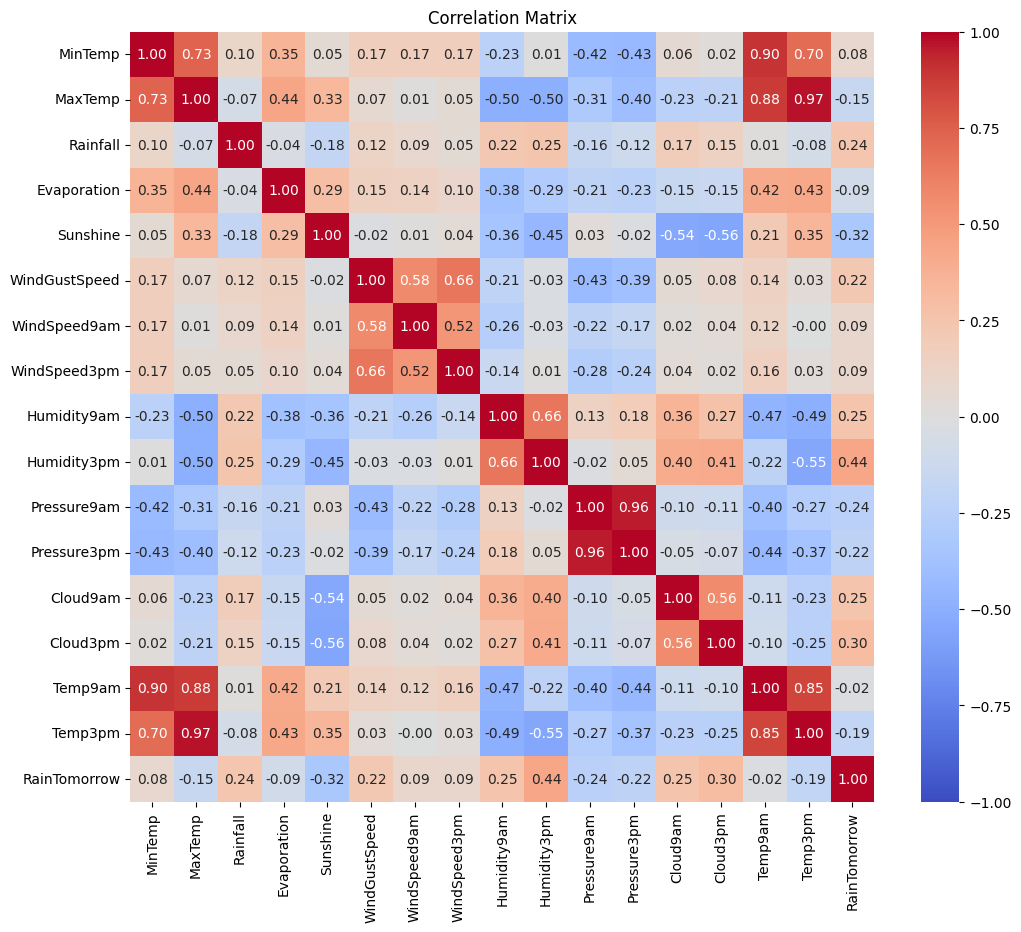

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# CSVファイルを読み込む
uploaded = files.upload()
data_base = pd.read_csv('float_train_imputed.csv')

# データの欠損値を確認（欠損値があると相関計算に影響するので、適切に処理する必要があります）
# 簡便のために、ここではdropnaを使って欠損値を含む行を削除しますが、他の方法（補間や別処置）もあります
# print("---a----")
# print(data_base.head())
# X = train_data[['Location' , 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']]
# data = data_base[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
#                  'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow']]
data = data_base[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow']]
# print("-b---")
# print(data.head())
data_cleaned = data.dropna()

# print("--c--")
# print(data_cleaned.head())
# 説明変数のみで相関を計算し、目的変数「RainTomorrow」との相関を見ます
correlation_matrix = data_cleaned.corr()

# 目的変数との相関を取得
correlation_with_target = correlation_matrix['RainTomorrow'].drop('RainTomorrow').sort_values(ascending=False)

# 相関が強い順に表示
print("目的変数 'RainTomorrow' との相関が強い説明変数:")
print(correlation_with_target)

# 相関行列のヒートマップを描画する
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# 深層学習_r5 sigmoid

In [ ]:
# !pip install pandas scikit-learn tensorflow
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# データの読み込み
# uploaded = files.upload()
data = pd.read_csv('float_train_imputed.csv')
# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を指定
X = data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]
# X = data[['Humidity3pm','Sunshine','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp', 'Evaporation', 'WindSpeed3pm']]
# X = data[['Humidity3pm','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp', 'WindSpeed3pm']]
# X = data[['Humidity3pm','Cloud3pm','Humidity9am','Cloud9am','Rainfall','WindGustSpeed']]
y = data['RainTomorrow']


# カテゴリ変数のエンコード
# encoder = LabelEncoder()
# X['Location'] = encoder.fit_transform(X['Location'])

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 二値目的変数のエンコード
# y_encoded = encoder.fit_transform(y)
# y_categorical = np_utils.to_categorical(y_encoded)  # yをone-hotエンコーディング

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# one-hotエンコーディングの適用
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# モデルの構築
model = Sequential()
# model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.1))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))  # ドロップアウトで30%のユニットをランダムに無効化

# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.1))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(y_train.shape[1], activation='sigmoid'))

# モデルのコンパイル
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# モデルの訓練
model.fit(X_train, y_train, epochs=25, batch_size=128, validation_split=0.1, verbose=1)
# モデルの保存
# model.save('512_256_128_sigmoid_ep25_ba128.h5')

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8216 - loss: 0.4024 - val_accuracy: 0.8534 - val_loss: 0.3514
Epoch 2/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8419 - loss: 0.3661 - val_accuracy: 0.8504 - val_loss: 0.3488
Epoch 3/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8420 - loss: 0.3612 - val_accuracy: 0.8532 - val_loss: 0.3466
Epoch 4/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8457 - loss: 0.3595 - val_accuracy: 0.8558 - val_loss: 0.3438
Epoch 5/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8395 - loss: 0.3654 - val_accuracy: 0.8549 - val_loss: 0.3444
Epoch 6/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8451 - loss: 0.3578 - val_accuracy: 0.8530 - val_loss: 0.3454
Epoch 7/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8440 - loss: 0.3599 - val_accuracy: 0.8571 - val_loss: 0.3430
Epoch 8/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8456 - loss: 0.3551 - val_accuracy: 0.

# モデル再検討_3

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files


# 訓練用データを読み込む
# uploaded = files.upload()
train_data = pd.read_csv('float_train_imputed.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。
# ここでは、'RainTomorrow' が目的変数で、その他が説明変数と仮定しています。

X = train_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
# Accuracy: 0.8547
# X = train_data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]
# Accuracy: 0.8524
# X = train_data[['Humidity3pm','Rainfall','Pressure3pm','Pressure9am','WindGustSpeed','Humidity9am','Sunshine','MinTemp','Temp3pm','MaxTemp','Temp9am']]
# Accuracy: 0.8495
# X = train_data[['Humidity3pm','Rainfall','Pressure3pm','Pressure9am','WindGustSpeed','Humidity9am','MinTemp','Temp3pm','MaxTemp','Temp9am']]
# X = data[['Location','Rainfall','Humidity3pm','Pressure3pm','Temp3pm']]
# X = data[['Rainfall','Humidity3pm','Pressure3pm','Temp3pm']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


# モデルを定義
models = {
    "Random Forest depth none": RandomForestClassifier(random_state=42),
    # "Random Forest depth 3": RandomForestClassifier(max_depth=3,random_state=42),
    # "Random Forest depth 5": RandomForestClassifier(max_depth=5,random_state=42),
    # "Random Forest depth 10": RandomForestClassifier(max_depth=10,random_state=42),
    "Random Forest depth 15": RandomForestClassifier(max_depth=15,random_state=42),
    # "Random Forest depth 20": RandomForestClassifier(max_depth=20,random_state=42),
    # "Random Forest depth 25": RandomForestClassifier(max_depth=25,random_state=42),
    # "Random Forest depth 30": RandomForestClassifier(max_depth=30,random_state=42),
}

# 各モデルの精度を計算
results = {}
for name, model in models.items():
    print(f"Evaluating {name}...")
    model.fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = np.mean(scores)
    print(f"{name}: Average Accuracy = {results[name]:.4f}")

# 結果を表示
print("\nModel Comparison:")
for name in results:
    print(f"{name}: {results[name]:.4f}")

Evaluating Random Forest depth none...
Random Forest depth none: Average Accuracy = 0.8488
Evaluating Random Forest depth 15...
Random Forest depth 15: Average Accuracy = 0.8495

Model Comparison:
Random Forest depth none: 0.8488
Random Forest depth 15: 0.8495


# グリッドサーチ

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# 訓練用データを読み込む
# uploaded = files.upload()
train_data = pd.read_csv('float_train_imputed.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。
# ここでは、'RainTomorrow' が目的変数で、その他が説明変数と仮定しています。

# Accuracy: 0.8547
# X = train_data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]
# Accuracy: 0.8524
# X = train_data[['Humidity3pm','Rainfall','Pressure3pm','Pressure9am','WindGustSpeed','Humidity9am','Sunshine','MinTemp','Temp3pm','MaxTemp','Temp9am']]
# Accuracy: 0.8495
X = train_data[['Humidity3pm','Rainfall','Pressure3pm','Pressure9am','WindGustSpeed','Humidity9am','MinTemp','Temp3pm','MaxTemp','Temp9am']]
# X = data[['Location','Rainfall','Humidity3pm','Pressure3pm','Temp3pm']]
# X = data[['Rainfall','Humidity3pm','Pressure3pm','Temp3pm']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ランダムフォレストモデルのインスタンス化
rf = RandomForestClassifier(random_state=42)

# グリッドサーチで探索するパラメータの設定
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [15],
    'min_samples_split': [1,2],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

# グリッドサーチオブジェクトの作成
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# グリッドサーチの実行
grid_search.fit(X_train, y_train)

# 最適なパラメータセットとそのスコアを出力
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# 最適なパラメータでテストデータに対する精度を計算
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", li

Best Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.8498083524136633
Test Accuracy: 0.8495732574679943


# 特徴量再調査

特徴量の重要度:
Humidity3pm      0.178742
Pressure3pm      0.064861
WindGustSpeed    0.059025
Pressure9am      0.058012
Sunshine         0.057512
Humidity9am      0.057426
Rainfall         0.055352
Date             0.052353
Temp3pm          0.049802
MinTemp          0.049734
MaxTemp          0.047650
Temp9am          0.047420
Location         0.037779
WindSpeed3pm     0.036967
Cloud3pm         0.036095
WindSpeed9am     0.034239
Evaporation      0.027596
RainToday        0.026892
Cloud9am         0.022542
dtype: float64


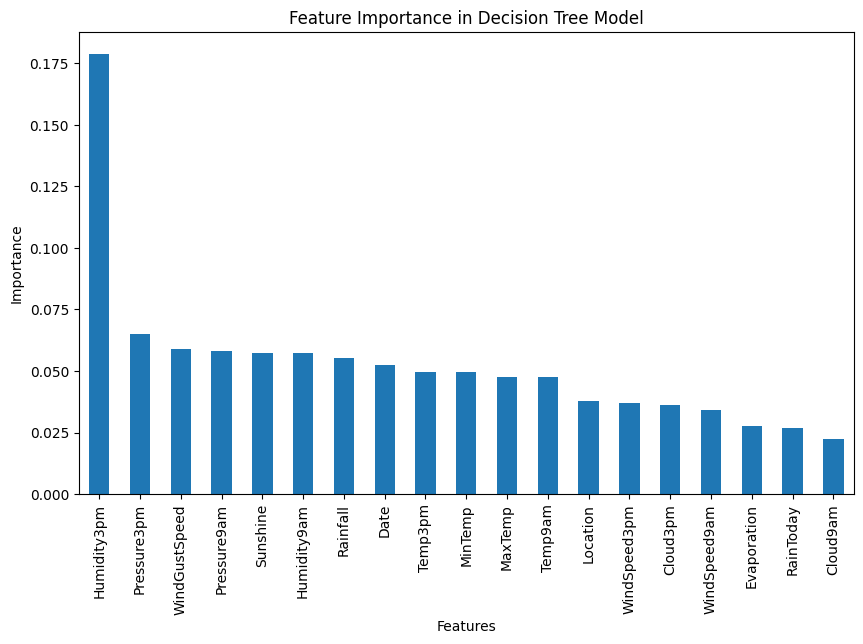

Accuracy: 0.8596


In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files
from sklearn.ensemble import RandomForestClassifier

# 訓練用データを読み込む
# uploaded = files.upload()
train_file = 'imputed_Date_chg_int_windDir_rm_moji_conv_train.csv'
train_data = pd.read_csv(train_file, header=0)


# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
X = train_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
# X = train_data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ランダムフォレストモデルを作成
model = RandomForestClassifier(random_state=42)

# モデルを訓練
model.fit(X_train, y_train)

# モデルを保存する
# model_filename = 'int_ptnB_theme2_randomforest_model.joblib'
# joblib.dump(model, model_filename)
# データの保存
# files.download('int_ptnB_theme2_randomforest_model.joblib')

# 特徴量の重要度を取得
importances = model.feature_importances_

# 結果を系列にまとめ、ソートして表示
feature_importance_df = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# 結果表示
print("特徴量の重要度:")
print(feature_importance_df)

# 特徴量の重要度をプロット
feature_importance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance in Decision Tree Model')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()


# テストデータでの予測
y_pred = model.predict(X_test)

# 精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# trainデータ欠損有りを文字列置換

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# 例としてデータロードとモデル訓練を行います
uploaded = files.upload()

# CSVファイルをロード
df = pd.read_csv('train.csv', dtype=str)

# 変換ルールを定義
# 分けた方が良さそうだが一旦ひとまとめ
conversion_map = {
    'Albury': 1,
    'Cobar': 2,
    'CoffsHarbour': 3,
    'Moree': 4,
    'NorfolkIsland': 5,
    'Richmond': 6,
    'Sydney': 7,
    'SydneyAirport': 8,
    'WaggaWagga': 9,
    'Williamtown': 10,
    'Wollongong': 11,
    'Canberra': 12,
    'Ballarat': 13,
    'Bendigo': 14,
    'Sale': 15,
    'MelbourneAirport': 16,
    'Melbourne': 17,
    'Mildura': 18,
    'Portland': 19,
    'Watsonia': 20,
    'Brisbane': 21,
    'Cairns': 22,
    'Townsville': 23,
    'MountGambier': 24,
    'Nuriootpa': 25,
    'Woomera': 26,
    'Albany': 27,
    'PearceRAAF': 28,
    'PerthAirport': 29,
    'Perth': 30,
    'Hobart': 31,
    'Launceston': 32,
    'AliceSprings': 33,
    'Darwin': 34,
    'Katherine': 35,
    'Uluru': 36,
    # --- データ欠損見て追加 ---
    'BadgerysCreek': 37,
    'Newcastle': 38,
    'NorahHead': 39,
    'Penrith': 40,
    'Tuggeranong': 41,
    'MountGinini': 42,
    'Nhil': 43,
    'Dartmoor': 44,
    'GoldCoast': 45,
    'Adelaide': 46,
    'Witchcliffe': 47,
    'SalmonGums': 48,
    'Walpole': 49,
    # --- 風向き変換  ---
    # 北:N
    'N': 0,
    # 北北東:NNE
    'NNE': 5,
    # 北東:NE
    'NE': 6,
    # 東北東:ENE
    'ENE': 7,
    # 東:E
    'E': 8,
    # 東南東:ESE
    'ESE': 7,
    # 南東:SE
    'SE': 6,
    # 南南東:SSE
    'SSE': 5,
    # 南:S
    'S': 0,
    # 南南西:SSW
    'SSW': 4,
    # 南西:SW
    'SW': 3,
    # 西南西:WSW
    'WSW': 2,
    # 西:W
    'W': 1,
    # 西北西:WNW
    'WNW': 2,
    # 北西:NW
    'NW': 3,
    # 北北西:NNW
    'NNW': 4
}

# 3カラム目（通常はインデックス2）を条件に基づいて変換
column_index = 2  # ここを変えれば別のカラムを指定できます

def convert_value(value):
    try:
        # もともと数字の場合はそのまま返す
        return int(value)
    except ValueError:
        # 変換マップで指定されている値ならマップの値を、それ以外なら52を返す
        # 変換外の異常値はWindDir3pmも連番と考えた場合の範囲外値
        return conversion_map.get(value, 52)

# 3カラム目と8カラム目のみに変換を適用する
columns_to_convert = [2, 8,10,11]

for index in columns_to_convert:
    df.iloc[:, index] = df.iloc[:, index].apply(convert_value)



# RainTodayを0,1変換
df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)

# RainTodayを0,1変換
df['RainTomorrow'] = df['RainTomorrow'].replace({'No': 0, 'Yes': 1}).astype(int)

# 必要に応じて、新しいCSVファイルに保存
df.to_csv('moji_conv_train.csv', index=False)
files.download('moji_conv_train.csv')

Saving train.csv to train.csv


<ipython-input-22-7963f7c341a1>:122: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)
<ipython-input-22-7963f7c341a1>:125: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainTomorrow'] = df['RainTomorrow'].replace({'No': 0, 'Yes': 1}).astype(int)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 深層学習モデル用のtrainデータ加工(SimpleImputer)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# データの読み込み
uploaded = files.upload()
df = pd.read_csv('Date_chg_int_windDir_rm_moji_conv_train.csv')

# SimpleImputerのインスタンスを作成（この例では列の平均で補完）
imputer = SimpleImputer(strategy='mean')

# 補完を適用
# 数値データが対象となるため、数値列のみを取得
numeric_cols = df.select_dtypes(include=[np.number]).columns
imputed_data = imputer.fit_transform(df[numeric_cols])

# 小数第1位以降を切り捨て
imputed_data_truncated = np.floor(imputed_data * 10) / 10

# 補完したデータを新しいデータフレームに挿入
df[numeric_cols] = imputed_data_truncated

# 補完後のデータを新しいCSVファイルとして保存
df.to_csv('imputed_Date_chg_int_windDir_rm_moji_conv_train.csv', index=False)

# ダウンロードする
files.download('imputed_Date_chg_int_windDir_rm_moji_conv_train.csv')

Saving Date_chg_int_windDir_rm_moji_conv_train.csv to Date_chg_int_windDir_rm_moji_conv_train.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# モデル再検討_4

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files


# 訓練用データを読み込む
# uploaded = files.upload()
train_data = pd.read_csv('imputed_Date_chg_int_windDir_rm_moji_conv_train.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。

# Test Accuracy: 0.8562
X = train_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
# Test Accuracy: 0.8562
# X = train_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
# Test Accuracy: 0.8563
# X = train_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
# Test Accuracy: 0.8548
# X = train_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# 最適なハイパーパラメータを使用してランダムフォレストモデルを構築
best_rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=25,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# モデルの訓練
# best_rf_model.fit(X_train, y_train)

# 全データで学習
best_rf_model.fit(X, y)

# モデルを保存する
model_filename = 'imputed_no_test_theme2_randomforest_model.joblib'
joblib.dump(model, model_filename)
# データの保存
files.download('imputed_no_test_theme2_randomforest_model.joblib')

# テストデータで予測
# y_pred = best_rf_model.predict(X_test)

# 予測精度の評価
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy: {accuracy:.4f}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# モデル再検討_4 交差検証

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files


# 訓練用データを読み込む
uploaded = files.upload()
train_data = pd.read_csv('imputed_Date_chg_int_windDir_rm_moji_conv_train.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。

# Test Accuracy: 0.8562
X = train_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
# Test Accuracy: 0.8562
# X = train_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
# Test Accuracy: 0.8563
# X = train_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
# Test Accuracy: 0.8548
# X = train_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# 最適なハイパーパラメータを使用してランダムフォレストモデルを構築
best_rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=25,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)


# 交差検証の実行
# cv=5 は5分割交差検証を行う設定です
cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='accuracy', n_jobs=-1)

# 各分割の精度と平均精度の表示
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", cv_scores.mean())

Saving imputed_Date_chg_int_windDir_rm_moji_conv_train.csv to imputed_Date_chg_int_windDir_rm_moji_conv_train.csv
Cross-Validation Scores: [0.84293504 0.83493362 0.84566145 0.85431484 0.85063126]
Average Cross-Validation Score: 0.8456952421913317


# モデル再検討_4向けグリッドサーチ

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# 訓練用データを読み込む
# uploaded = files.upload()
train_data = pd.read_csv('imputed_Date_chg_int_windDir_rm_moji_conv_train.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。
# ここでは、'RainTomorrow' が目的変数で、その他が説明変数と仮定しています。

X = train_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# ランダムフォレストモデルのインスタンス化
rf = RandomForestClassifier(random_state=42)

# グリッドサーチで探索するパラメータの設定
param_grid = {
    'n_estimators': [200],
    'max_depth': [25],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

# グリッドサーチオブジェクトの作成
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# グリッドサーチの実行
grid_search.fit(X_train, y_train)

# 最適なパラメータセットとそのスコアを出力
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# 最適なパラメータでテストデータに対する精度を計算
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameters: {'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.8551821883805388
Test Accuracy: 0.8563300142247511


# testデータ欠損有りを文字列置換

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# 例としてデータロードとモデル訓練を行います
# uploaded = files.upload()

# CSVファイルをロード
df = pd.read_csv('test.csv', dtype=str)

# 変換ルールを定義
# 分けた方が良さそうだが一旦ひとまとめ
conversion_map = {
    'Albury': 1,
    'Cobar': 2,
    'CoffsHarbour': 3,
    'Moree': 4,
    'NorfolkIsland': 5,
    'Richmond': 6,
    'Sydney': 7,
    'SydneyAirport': 8,
    'WaggaWagga': 9,
    'Williamtown': 10,
    'Wollongong': 11,
    'Canberra': 12,
    'Ballarat': 13,
    'Bendigo': 14,
    'Sale': 15,
    'MelbourneAirport': 16,
    'Melbourne': 17,
    'Mildura': 18,
    'Portland': 19,
    'Watsonia': 20,
    'Brisbane': 21,
    'Cairns': 22,
    'Townsville': 23,
    'MountGambier': 24,
    'Nuriootpa': 25,
    'Woomera': 26,
    'Albany': 27,
    'PearceRAAF': 28,
    'PerthAirport': 29,
    'Perth': 30,
    'Hobart': 31,
    'Launceston': 32,
    'AliceSprings': 33,
    'Darwin': 34,
    'Katherine': 35,
    'Uluru': 36,
    # --- データ欠損見て追加 ---
    'BadgerysCreek': 37,
    'Newcastle': 38,
    'NorahHead': 39,
    'Penrith': 40,
    'Tuggeranong': 41,
    'MountGinini': 42,
    'Nhil': 43,
    'Dartmoor': 44,
    'GoldCoast': 45,
    'Adelaide': 46,
    'Witchcliffe': 47,
    'SalmonGums': 48,
    'Walpole': 49,
    # --- 風向き変換  ---
    # 北:N
    'N': 0,
    # 北北東:NNE
    'NNE': 5,
    # 北東:NE
    'NE': 6,
    # 東北東:ENE
    'ENE': 7,
    # 東:E
    'E': 8,
    # 東南東:ESE
    'ESE': 7,
    # 南東:SE
    'SE': 6,
    # 南南東:SSE
    'SSE': 5,
    # 南:S
    'S': 0,
    # 南南西:SSW
    'SSW': 4,
    # 南西:SW
    'SW': 3,
    # 西南西:WSW
    'WSW': 2,
    # 西:W
    'W': 1,
    # 西北西:WNW
    'WNW': 2,
    # 北西:NW
    'NW': 3,
    # 北北西:NNW
    'NNW': 4
}

# 3カラム目（通常はインデックス2）を条件に基づいて変換
column_index = 2  # ここを変えれば別のカラムを指定できます

def convert_value(value):
    try:
        # もともと数字の場合はそのまま返す
        return int(value)
    except ValueError:
        # 変換マップで指定されている値ならマップの値を、それ以外なら52を返す
        # 変換外の異常値はWindDir3pmも連番と考えた場合の範囲外値
        return conversion_map.get(value, 52)

# 3カラム目と8カラム目のみに変換を適用する
columns_to_convert = [2, 8,10,11]

for index in columns_to_convert:
    df.iloc[:, index] = df.iloc[:, index].apply(convert_value)



# RainTodayを0,1変換
df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)

# RainTodayを0,1変換
# df['RainTomorrow'] = df['RainTomorrow'].replace({'No': 0, 'Yes': 1}).astype(int)

# 必要に応じて、新しいCSVファイルに保存
df.to_csv('moji_conv_test.csv', index=False)
files.download('moji_conv_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 深層学習モデル用のtestデータ加工(SimpleImputer)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# データの読み込み
uploaded = files.upload()
df = pd.read_csv('Date_chg_int_windDir_rm_moji_conv_test.csv')

# SimpleImputerのインスタンスを作成（この例では列の平均で補完）
imputer = SimpleImputer(strategy='mean')

# 補完を適用
# 数値データが対象となるため、数値列のみを取得
numeric_cols = df.select_dtypes(include=[np.number]).columns
imputed_data = imputer.fit_transform(df[numeric_cols])

# 小数第1位以降を切り捨て
imputed_data_truncated = np.floor(imputed_data * 10) / 10

# 補完したデータを新しいデータフレームに挿入
df[numeric_cols] = imputed_data_truncated

# 補完後のデータを新しいCSVファイルとして保存
df.to_csv('imputed_Date_chg_int_windDir_rm_moji_conv_test.csv', index=False)

# ダウンロードする
files.download('imputed_Date_chg_int_windDir_rm_moji_conv_test.csv')

Saving Date_chg_int_windDir_rm_moji_conv_test.csv to Date_chg_int_windDir_rm_moji_conv_test.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 手動エクセル加工後の実際の評価(ランダムフォレスト_4)

In [ ]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files

# 保存されたモデルを読み込む
uploaded = files.upload()
model_filename = 'imputed_no_test_theme2_randomforest_model.joblib'
model = joblib.load(model_filename)

# 評価用データを読み込む
test_file = 'id_plus_imputed_Date_chg_int_windDir_rm_moji_conv_test.csv'
test_data = pd.read_csv(test_file, header=0)
### デバッグ
# print("---test_data---")
# print(test_data)

# 2行目から説明変数を取得
X_test = test_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
# X_test = test_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]

### デバッグ
# print("---X_test---")
# print(X_test)
# データが数値型であるか確認、必要に応じて変換する
# X_test = X_test.apply(pd.to_numeric, errors='coerce')

# 予測を行う
predictions = model.predict(X_test)

# 出力結果のDataFrameを作成
output = pd.DataFrame({
    'Original_Value': test_data.iloc[0:, 0].values,  # 1カラム目のデータ
    'Predicted': predictions  # モデルの予測値
})

# CSVファイルに出力
# CSVに保存（ヘッダー無し）
result_filename = '1212_model4_notest_theme2_randomforest_result.csv'
output.to_csv(result_filename, index=False, header=False)
print(f"Predictions saved to {result_filename}")
files.download('1212_model4_notest_theme2_randomforest_result.csv')

Saving id_plus_imputed_Date_chg_int_windDir_rm_moji_conv_test.csv to id_plus_imputed_Date_chg_int_windDir_rm_moji_conv_test (1).csv
Predictions saved to 1212_model4_notest_theme2_randomforest_result.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 深層学習再チェック

In [ ]:
# !pip install pandas scikit-learn tensorflow
# !pip install --upgrade jax jaxlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# データの読み込み
# uploaded = files.upload()
data = pd.read_csv('imputed_Date_chg_int_windDir_rm_moji_conv_train.csv')
# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を指定
X = data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
# X = data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]
# X = data[['Humidity3pm','Sunshine','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp', 'Evaporation', 'WindSpeed3pm']]
# X = data[['Humidity3pm','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp', 'WindSpeed3pm']]
# X = data[['Humidity3pm','Cloud3pm','Humidity9am','Cloud9am','Rainfall','WindGustSpeed']]
y = data['RainTomorrow']


# カテゴリ変数のエンコード
# encoder = LabelEncoder()
# X['Location'] = encoder.fit_transform(X['Location'])

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 二値目的変数のエンコード
# y_encoded = encoder.fit_transform(y)
# y_categorical = np_utils.to_categorical(y_encoded)  # yをone-hotエンコーディング

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# one-hotエンコーディングの適用
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# モデルの構築
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.1))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))  # ドロップアウトで30%のユニットをランダムに無効化

# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.1))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(y_train.shape[1], activation='sigmoid'))

# モデルのコンパイル
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# モデルの訓練
model.fit(X_train, y_train, epochs=25, batch_size=128, validation_split=0.1, verbose=1)
# モデルの保存
# model.save('512_256_128_sigmoid_ep25_ba128.h5')

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


534/534 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8332 - loss: 0.3815 - val_accuracy: 0.8518 - val_loss: 0.3477
Epoch 2/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8486 - loss: 0.3515 - val_accuracy: 0.8537 - val_loss: 0.3437
Epoch 3/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8542 - loss: 0.3407 - val_accuracy: 0.8554 - val_loss: 0.3386
Epoch 4/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8529 - loss: 0.3392 - val_accuracy: 0.8566 - val_loss: 0.3401
Epoch 5/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8546 - loss: 0.3387 - val_accuracy: 0.8513 - val_loss: 0.3408
Epoch 6/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8565 - loss: 0.3322 - val_accuracy: 0.8575 - val_loss: 0.3362
Epoch 7/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8571 - loss: 0.3305 - val_accuracy: 0.8553 - val_loss: 0.3369
Epoch 8/25
534/534 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8587 - loss: 0.3301 - val_accuracy: 

# 深層学習モデル作成_5

In [ ]:
# !pip install pandas scikit-learn tensorflow
# !pip install --upgrade jax jaxlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# データの読み込み
# uploaded = files.upload()
data = pd.read_csv('imputed_Date_chg_int_windDir_rm_moji_conv_train.csv')
# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を指定
X = data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
y = data['RainTomorrow']


# カテゴリ変数のエンコード
# encoder = LabelEncoder()
# X['Location'] = encoder.fit_transform(X['Location'])

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 二値目的変数のエンコード
# y_encoded = encoder.fit_transform(y)
# y_categorical = np_utils.to_categorical(y_encoded)  # yをone-hotエンコーディング

# データを訓練データとテストデータに分割
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# one-hotエンコーディングの適用
y_train = to_categorical(y)
y_test = to_categorical(y_test)

# モデルの構築
model = Sequential()
model.add(Dense(512, input_dim=X_scaled.shape[1], activation='relu'))
model.add(Dropout(0.1))  # ドロップアウトで10%のユニットをランダムに無効化

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))  # ドロップアウトで10%のユニットをランダムに無効化

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))  # ドロップアウトで10%のユニットをランダムに無効化

# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.1))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(y_train.shape[1], activation='sigmoid'))

# モデルのコンパイル
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# モデルの訓練
model.fit(X_scaled, y_train, epochs=25, batch_size=128, validation_split=0.1, verbose=1)
# モデルの保存
model.save('notest_512_256_128_sigmoid_ep25_ba128.h5')

# モデルの評価
#loss, accuracy = model.evaluate(X_test, y_test)
#print(f'Test Accuracy: {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
594/594 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.8300 - loss: 0.3847 - val_accuracy: 0.8736 - val_loss: 0.2974
Epoch 2/25
594/594 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.8469 - loss: 0.3582 - val_accuracy: 0.8743 - val_loss: 0.2886
Epoch 3/25
594/594 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8482 - loss: 0.3495 - val_accuracy: 0.8784 - val_loss: 0.2934
Epoch 4/25
594/594 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8508 - loss: 0.3470 - val_accuracy: 0.8746 - val_loss: 0.2943
Epoch 5/25
594/594 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8534 - loss: 0.3421 - val_accuracy: 0.8759 - val_loss: 0.2913
Epoch 6/25
594/594 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8552 - loss: 0.3373 - val_accuracy: 0.8753 - val_loss: 0.3036
Epoch 7/25
594/594 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.8558 - loss: 0.3384 - val_accuracy: 0.8762 - val_loss: 0.2890
Epoch 8/25
594/594 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8566 - loss: 0.3368 - val_

# 深層学習評価_5

In [ ]:
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam



# CSVファイルからデータを読み込む
uploaded = files.upload()
data = pd.read_csv('imputed_Date_chg_int_windDir_rm_moji_conv_test.csv')

# 必要に応じてデータの前処理を行う
# ここでは標準化（Standard Scaling）を例にしています
scaler = StandardScaler()
X_test = scaler.fit_transform(data.values)  # assuming data is not labeled

# モデルのロード
model = load_model('notest_512_256_128_sigmoid_ep25_ba128.h5')

# モデルを使用して予測
predictions = model.predict(X_test)

# 予測結果を表示
# Softmaxの出力なので、各行で最大値のインデックスが予測クラス
predicted_classes = predictions.argmax(axis=1)

# 予測結果をデータフレームに変換
results_df = pd.DataFrame({
    'Predicted_Class': predicted_classes,
    'Prediction_Probabilities': [list(pred) for pred in predictions]  # 各サンプルのすべての確率を格納
})

# CSVファイルに出力
# CSVに保存（ヘッダー無し）
result_filename = 'notest_1216_sigmoid_theme2_result.csv'
results_df.to_csv(result_filename, index=False, header=False)
print(f"Predictions saved to {result_filename}")
files.download('notest_1216_sigmoid_theme2_result.csv')

Saving imputed_Date_chg_int_windDir_rm_moji_conv_test.csv to imputed_Date_chg_int_windDir_rm_moji_conv_test.csv


882/882 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
Predictions saved to notest_1216_sigmoid_theme2_result.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 深層学習_softmax

In [ ]:
# !pip install pandas scikit-learn tensorflow
# !pip install --upgrade jax jaxlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# データの読み込み
# uploaded = files.upload()
data = pd.read_csv('del_id_date_sort_int_temp_upd_imputed_Del_blank_All_combin.csv')
# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を指定
X = data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
# X = data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]
# X = data[['Humidity3pm','Sunshine','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp', 'Evaporation', 'WindSpeed3pm']]
# X = data[['Humidity3pm','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp', 'WindSpeed3pm']]
# X = data[['Humidity3pm','Cloud3pm','Humidity9am','Cloud9am','Rainfall','WindGustSpeed']]
y = data['RainTomorrow']


# カテゴリ変数のエンコード
# encoder = LabelEncoder()
# X['Location'] = encoder.fit_transform(X['Location'])

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 二値目的変数のエンコード
# y_encoded = encoder.fit_transform(y)
# y_categorical = np_utils.to_categorical(y_encoded)  # yをone-hotエンコーディング

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# one-hotエンコーディングの適用
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# モデルの構築
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.1))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(y_train.shape[1], activation='softmax'))

# モデルのコンパイル
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# モデルの訓練
model.fit(X_train, y_train, epochs=25, batch_size=128, validation_split=0.1, verbose=1)
# モデルの保存
# model.save('512_256_128_sigmoid_ep25_ba128.h5')

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
711/711 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8326 - loss: 0.3840 - val_accuracy: 0.8492 - val_loss: 0.3475
Epoch 2/25
711/711 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8477 - loss: 0.3578 - val_accuracy: 0.8516 - val_loss: 0.3430
Epoch 3/25
711/711 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8519 - loss: 0.3491 - val_accuracy: 0.8527 - val_loss: 0.3382
Epoch 4/25
711/711 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8508 - loss: 0.3491 - val_accuracy: 0.8544 - val_loss: 0.3376
Epoch 5/25
711/711 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8528 - loss: 0.3419 - val_accuracy: 0.8545 - val_loss: 0.3369
Epoch 6/25
711/711 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8516 - loss: 0.3429 - val_accuracy: 0.8560 - val_loss: 0.3358
Epoch 7/25
711/711 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8559 - loss: 0.3375 - val_accuracy: 0.8545 - val_loss: 0.3328
Epoch 8/25
711/711 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8520 - loss: 0.3426 - val_accu

# 深層学習検証

In [ ]:
# !pip install pandas scikit-learn tensorflow
# !pip install --upgrade jax jaxlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout

# データの読み込み
# uploaded = files.upload()
data = pd.read_csv('imputed_Date_chg_int_windDir_rm_moji_conv_train.csv')
# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を指定
X = data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
# X = data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]
# X = data[['Humidity3pm','Sunshine','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp', 'Evaporation', 'WindSpeed3pm']]
# X = data[['Humidity3pm','Pressure3pm','Pressure9am','Cloud3pm','WindGustSpeed','Rainfall','Humidity9am','MinTemp','Temp3pm','Temp9am', 'MaxTemp', 'WindSpeed3pm']]
# X = data[['Humidity3pm','Cloud3pm','Humidity9am','Cloud9am','Rainfall','WindGustSpeed']]
y = data['RainTomorrow']


# カテゴリ変数のエンコード
# encoder = LabelEncoder()
# X['Location'] = encoder.fit_transform(X['Location'])

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 二値目的変数のエンコード
# y_encoded = encoder.fit_transform(y)
# y_categorical = np_utils.to_categorical(y_encoded)  # yをone-hotエンコーディング

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# one-hotエンコーディングの適用
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


#-----------------------
# トレーニングデータ(x)を１次元化し、学習をランダムにドロップして過学習を予防しながら、何枚かのレイヤーでDNNを構成し、目的変数(y)に収束させる
# Denseのunit数を増やしたり、レイヤ枚数を増やすことで学習できるネットワークのサイズは大きくなっていく
dropratio = 0.2  # 例えば20%のニューロンをランダムに無効化
learning_rate = 0.001  # 一般的な初期値ですが、必要に応じて調整してください

model = Sequential()
model.add(Input(shape=(X_train.shape[1],1)))
model.add(Flatten())
model.add(Dropout(dropratio))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(dropratio))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(dropratio))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(dropratio))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=y_train.shape[1], activation='sigmoid'))

from tensorflow.keras.optimizers import Adam

# 多値分類なので categorical_crossentropy でロスを計算する
# optimizerはいろいろな種類・パラメータがあるので調べてみるとよい
# 評価基準は Accuracy なので acc のmetricsを指定。ただしここを変えるとコールバックで見えるもの(acc)も変わるので注意
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(learning_rate = learning_rate),
    metrics = ['acc']
)

model.summary()

# コールバックを指定しつつ、トレーニングを実行する
hist = model.fit(X_train, y_train,
    epochs = 25,
    batch_size = 128,
    validation_data = (X_test, y_test),
#    callbacks = [mycallback, checkpoint, early],
    shuffle = True,
    verbose = 0,
)

# 途中でセーブされている、val_loss値がベストだった時の重みデータを読みなおす
model.load_weights(weightfile)

#-----------------------
# モデルの構築
# model = Sequential()
# model.add(Dense(1024, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

# model.add(Dense(y_train.shape[1], activation='sigmoid'))

# モデルのコンパイル
# optimizer = Adam(learning_rate=0.001)
# model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# モデルの訓練
# model.fit(X_train, y_train, epochs=25, batch_size=256, validation_split=0.1, verbose=1)
# モデルの保存
# model.save('512_256_128_sigmoid_ep25_ba128.h5')

# モデルの評価
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f'Test Accuracy: {accuracy:.4f}')

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)                  │ (None, 19)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 19)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 64)                  │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,042 (15.79 KB)

 Trainable params: 4,042 (15.79 KB)

 Non-trainable params: 0 (0.00 B)

NameError: name 'weightfile' is not defined

# One-Hotデータ処理 + DNNによる多値分類例)

In [ ]:
outputname = 'DNN_One-Hot'

epochs = 1000
earlystep = 50
batch_size = 1024
validation_split = 0.2
dropratio = 0.1
learning_rate = 0.01

# モデルチューニング

In [ ]:
# !pip install pandas scikit-learn tensorflow
# !pip install --upgrade jax jaxlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout

# データの読み込み
# uploaded = files.upload()
data = pd.read_csv('imputed_Date_chg_int_windDir_rm_moji_conv_train.csv')


# 説明変数と目的変数を指定
x = data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
y = data['RainTomorrow']
x_train, x_eval, y_train, y_eval = train_test_split(x, y, test_size = validation_split)


# なんかチューニング周りの定義っぽい
# トレーニング時の表示やグラフの作成などの周辺カスタマイズの一例

In [ ]:
import matplotlib.pyplot as plt
import datetime
from matplotlib.image import imread
from keras.models import Sequential
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# 表示をカスタマイズし、学習曲線をグラフ化するためのコールバック（例）
class MyCallback(Callback):
    def __init__(self):
        self.acc = []
        self.val_acc = []
        self.loss = []
        self.val_loss = []

        self.last_acc, self.last_val_acc = None, None
        self.last_loss, self.last_val_loss = None, None
        self.now_epoch, self.epochs = None, None
        self.best_val_loss, self.best_epoch = None, None

    def print_progress(self, epoch):
        epochs = self.epochs

        if self.last_val_acc and self.last_val_loss and self.best_val_loss:
            print("\rEpoch %d/%d -- loss: %f acc: %f - val_loss: %f val_acc: %f - best_val_loss: %f on Epoch %d" % (epoch+1, epochs, self.last_loss, self.last_acc, self.last_val_loss, self.last_val_acc, self.best_val_loss, self.best_epoch+1), end='')
        else:
            print("\rEpoch %d/%d -- loss: %f acc: %f" % (epoch+1, epochs, self.last_loss, self.last_acc), end='')

    def on_train_begin(self, logs={}):
        print('\n##### Train Start ##### ' + str(datetime.datetime.now()))
        self.epochs = self.params['epochs']
        self.params['verbose'] = 0
        self.best_epoch = None

    def on_epoch_begin(self, epoch, log={}):
        self.now_epoch = epoch

    def on_batch_end(self, batch, logs={}):
        self.last_acc = logs.get('acc') if logs.get('acc') else 0.0
        self.last_loss = logs.get('loss') if logs.get('loss') else 0.0

    def on_epoch_end(self, epoch, logs={}):
        self.acc.append(logs['acc'])
        self.val_acc.append(logs['val_acc'])
        self.loss.append(logs['loss'])
        self.val_loss.append(logs['val_loss'])
        epochs = range(len(self.loss))

        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()

        ax1.plot(epochs, self.acc, color = "blue", linestyle = "solid", linewidth = 1.0, label = 'train acc')
        ax1.plot(epochs, self.val_acc, color = "red", linestyle = "solid", linewidth = 1.0, label = 'valid acc')
        ax2.plot(epochs, self.loss, color = "blue", linestyle = "dotted" ,linewidth = 1.0, label = 'train loss')
        ax2.plot(epochs, self.val_loss, color = "red", linestyle = "dotted" , linewidth = 1.0, label= 'valid loss')
        ax2.set_yscale("log")
        ax1.set_ylim(0,1)
        ax1.grid(which='both')
        hd1, lb1 = ax1.get_legend_handles_labels()
        hd2, lb2 = ax2.get_legend_handles_labels()
        ax1.legend(hd1 + hd2, lb1 + lb2, loc = 'center right')
        plt.savefig(f'{outputname}.png')
        plt.clf()
        plt.close()

        self.last_val_acc = logs.get('val_acc') if logs.get('val_acc') else 0.0
        self.last_val_loss = logs.get('val_loss') if logs.get('val_loss') else 0.0
        update = False
        if not self.best_epoch or self.last_val_loss < self.best_val_loss:
            if self.best_epoch and epoch - self.best_epoch > 1:
                update = True
            self.best_val_loss = self.last_val_loss
            self.best_epoch = epoch
        self.print_progress(epoch)
        if update:
            print('')

    def on_train_end(self, logs={}):
        print('\n##### Train Complete ##### ' + str(datetime.datetime.now()))

        plt.axis('off')
        plt.imshow(imread(f'{outputname}.png'))

mycallback = MyCallback()

# val_loss値が最も小さいときの重みデータを保存するためのコールバック
weightfile = f'{outputname}.weights.h5'
print("---a--")
print(weightfile)

checkpoint = ModelCheckpoint(
    weightfile,
    monitor = 'val_loss',
    save_best_only = True,
    save_weights_only = True,
    mode = 'min',
    verbose = 0,
)

# val_loss値が減らなくなったときにあきらめてストップさせるためのコールバック
# One-Hotデータ処理 + DNNによる多値分類例)のコードで変数更新
early = EarlyStopping(
    monitor = 'val_loss',
    patience = earlystep,
    mode = 'min',
    verbose = 1,
)

print("-----")
print(weightfile)
model.save_weights(weightfile)

---a--
DNN_One-Hot.weights.h5
-----
DNN_One-Hot.weights.h5


# [NG]DNNモデル検証(グリッドサーチ)

In [ ]:
# !pip install pandas scikit-learn tensorflow
# !pip install --upgrade jax jaxlib
!pip install --upgrade tensorflow keras
!pip install keras-tuner

import pandas as pd
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout

# データの読み込み
# uploaded = files.upload()
data = pd.read_csv('imputed_Date_chg_int_windDir_rm_moji_conv_train.csv')
# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を指定
# X = data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
X = data[['Humidity3pm', 'Cloud3pm', 'Cloud9am', 'Humidity9am', 'Rainfall']]
y = data['RainTomorrow']


# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# one-hotエンコーディングの適用
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#----------------------
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# モデルの構築関数
def create_model(optimizer='adam', init_mode='uniform'):
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(8, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


# KerasClassifierをラップ
model = KerasClassifier(build_fn=create_model, verbose=0)

# ハイパーパラメータグリッドの設定
param_grid = {
    'batch_size': [64, 128],
    'epochs': [20],
    'optimizer': ['SGD', 'Adam'],
    'init_mode': ['uniform', 'lecun_uniform']
}

# グリッドサーチのセットアップ
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# グリッドサーチの実行
grid_result = grid.fit(X_train, y_train)

# 最良の結果の出力
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")



ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

# DNNモデル検証_BK

In [ ]:
# !pip install pandas scikit-learn tensorflow
# !pip install --upgrade jax jaxlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout

# データの読み込み
# uploaded = files.upload()
data = pd.read_csv('imputed_Date_chg_int_windDir_rm_moji_conv_train.csv')
# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を指定
# X = data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
X = data[['Humidity3pm', 'Cloud3pm', 'Cloud9am', 'Humidity9am', 'Rainfall']]
y = data['RainTomorrow']


# カテゴリ変数のエンコード
# encoder = LabelEncoder()
# X['Location'] = encoder.fit_transform(X['Location'])

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 二値目的変数のエンコード
# y_encoded = encoder.fit_transform(y)
# y_categorical = np_utils.to_categorical(y_encoded)  # yをone-hotエンコーディング

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# one-hotエンコーディングの適用
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#----------------------
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# モデルの構築関数
def create_model(optimizer='adam', init_mode='uniform'):
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(8, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


# KerasClassifierをラップ
model = KerasClassifier(build_fn=create_model, verbose=0)

# ハイパーパラメータグリッドの設定
param_grid = {
    'batch_size': [64, 128],
    'epochs': [20],
    'optimizer': ['SGD', 'Adam'],
    'init_mode': ['uniform', 'lecun_uniform']
}

# グリッドサーチのセットアップ
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

# グリッドサーチの実行
grid_result = grid.fit(X_train, y_train)

# 最良の結果の出力
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

print("---------")
#-----------------------
# トレーニングデータ(x)を１次元化し、学習をランダムにドロップして過学習を予防しながら、何枚かのレイヤーでDNNを構成し、目的変数(y)に収束させる
# Denseのunit数を増やしたり、レイヤ枚数を増やすことで学習できるネットワークのサイズは大きくなっていく
dropratio = 0.1  # 例えば20%のニューロンをランダムに無効化
learning_rate = 0.001  # 一般的な初期値ですが、必要に応じて調整してください

# model = Sequential()
# model.add(Input(shape=(X_train.shape[1],1)))
# model.add(Flatten())
# model.add(Dropout(dropratio))
# model.add(Dense(units=64, activation='relu'))
# model.add(Dropout(dropratio))
# model.add(Dense(units=32, activation='relu'))
# model.add(Dropout(dropratio))
# model.add(Dense(units=16, activation='relu'))
# model.add(Dropout(dropratio))
# model.add(Dense(units=8, activation='relu'))
# model.add(Dense(units=y_train.shape[1], activation='sigmoid'))
# -------------------------------------------------------#
# model.add(Input(shape=(X_train.shape[1],1)))
# model.add(Flatten())
# model.add(Dropout(dropratio))
# model.add(Dense(units=1024, activation='relu'))
# model.add(Dropout(dropratio))
# model.add(Dense(units=512, activation='relu'))
# model.add(Dropout(dropratio))
# model.add(Dense(units=128, activation='relu'))
# model.add(Dense(units=y_train.shape[1], activation='sigmoid'))

from tensorflow.keras.optimizers import Adam

# 多値分類なので categorical_crossentropy でロスを計算する
# optimizerはいろいろな種類・パラメータがあるので調べてみるとよい
# 評価基準は Accuracy なので acc のmetricsを指定。ただしここを変えるとコールバックで見えるもの(acc)も変わるので注意
# model.compile(
#    loss = 'categorical_crossentropy',
#     optimizer = Adam(learning_rate = learning_rate),
#     metrics = ['acc']
# )

# model.summary()

# コールバックを指定しつつ、トレーニングを実行する
# hist = model.fit(X_train, y_train,
#     epochs = 30,
#     batch_size = 128,
#     validation_data = (X_test, y_test),
#     callbacks = [mycallback, checkpoint, early],
#     shuffle = True,
#     verbose = 0,
# )

# print("---b----")
# print(weightfile)

# 途中でセーブされている、val_loss値がベストだった時の重みデータを読みなおす
# model.load_weights(weightfile)

#-----------------------
# モデルの構築
# model = Sequential()
# model.add(Dense(1024, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

# model.add(Dense(y_train.shape[1], activation='sigmoid'))

# モデルのコンパイル
# optimizer = Adam(learning_rate=0.001)
# model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# モデルの訓練
# model.fit(X_train, y_train, epochs=25, batch_size=256, validation_split=0.1, verbose=1)
# モデルの保存
# model.save('512_256_128_sigmoid_ep25_ba128.h5')

# モデルの評価
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f'Test Accuracy: {accuracy:.4f}')

# DNNモデル検証_ごりおし

In [ ]:
# !pip install pandas scikit-learn tensorflow
# !pip install --upgrade jax jaxlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# データの読み込み
uploaded = files.upload()
data = pd.read_csv('temp_conv_imputed_Date_chg_int_windDir_rm_moji_conv_train.csv')
# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を指定
X = data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
y = data['RainTomorrow']


# カテゴリ変数のエンコード
# encoder = LabelEncoder()
# X['Location'] = encoder.fit_transform(X['Location'])

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 二値目的変数のエンコード
# y_encoded = encoder.fit_transform(y)
# y_categorical = np_utils.to_categorical(y_encoded)  # yをone-hotエンコーディング

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# one-hotエンコーディングの適用
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#-----------------------
# トレーニングデータ(x)を１次元化し、学習をランダムにドロップして過学習を予防しながら、何枚かのレイヤーでDNNを構成し、目的変数(y)に収束させる
# Denseのunit数を増やしたり、レイヤ枚数を増やすことで学習できるネットワークのサイズは大きくなっていく
dropratio = 0.01  # 例えば20%のニューロンをランダムに無効化
learning_rate = 0.001  # 一般的な初期値ですが、必要に応じて調整してください

model = Sequential()
model.add(Input(shape=(X_train.shape[1],1)))
model.add(Flatten())
model.add(Dropout(dropratio))
model.add(Dense(units=512, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dropout(dropratio))
model.add(Dense(units=256, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dropout(dropratio))
# model.add(Dense(units=16, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dropout(dropratio))
# model.add(Dense(units=8, kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dense(units=y_train.shape[1], activation='sigmoid'))
# -------------------------------------------------------#
# model.add(Input(shape=(X_train.shape[1],1)))
# model.add(Flatten())
# model.add(Dropout(dropratio))
# model.add(Dense(units=1024, activation='relu'))
# model.add(Dropout(dropratio))
# model.add(Dense(units=512, activation='relu'))
# model.add(Dropout(dropratio))
# model.add(Dense(units=128, activation='relu'))
# model.add(Dense(units=y_train.shape[1], activation='sigmoid'))

from tensorflow.keras.optimizers import Adam

# 多値分類なので categorical_crossentropy でロスを計算する
# optimizerはいろいろな種類・パラメータがあるので調べてみるとよい
# 評価基準は Accuracy なので acc のmetricsを指定。ただしここを変えるとコールバックで見えるもの(acc)も変わるので注意
model.compile(
   loss = 'categorical_crossentropy',
    #optimizer = Adam(learning_rate = learning_rate),
    # 変えてみる
    optimizer = RMSprop(learning_rate = learning_rate),
    metrics = ['acc']
)

# modelのサマリー表示
# model.summary()

# コールバックを指定しつつ、トレーニングを実行する
hist = model.fit(X_train, y_train,
    epochs = 25,
    batch_size = 128,
    validation_data = (X_test, y_test),
#    callbacks = [mycallback, checkpoint, early],
    shuffle = True,
    verbose = 0,
)

# print("---b----")
# print(weightfile)

# 途中でセーブされている、val_loss値がベストだった時の重みデータを読みなおす
# model.load_weights(weightfile)

#-----------------------
# モデルの構築
model = Sequential()
model.add(Dense(1024, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(y_train.shape[1], activation='sigmoid'))

# モデルのコンパイル
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# モデルの訓練
model.fit(X_train, y_train, epochs=25, batch_size=256, validation_split=0.1, verbose=1)
# モデルの保存
# model.save('512_256_128_sigmoid_ep25_ba128.h5')

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


238/238 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.8214 - loss: 0.3873 - val_accuracy: 0.8515 - val_loss: 0.3472
Epoch 2/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.8508 - loss: 0.3467 - val_accuracy: 0.8561 - val_loss: 0.3414
Epoch 3/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8535 - loss: 0.3377 - val_accuracy: 0.8557 - val_loss: 0.3444
Epoch 4/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.8565 - loss: 0.3340 - val_accuracy: 0.8548 - val_loss: 0.3380
Epoch 5/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.8565 - loss: 0.3353 - val_accuracy: 0.8503 - val_loss: 0.3454
Epoch 6/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.8564 - loss: 0.3325 - val_accuracy: 0.8582 - val_loss: 0.3353
Epoch 7/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.8607 - loss: 0.3224 - val_accuracy: 0.8551 - val_loss: 0.3367
Epoch 8/25
238/238 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.8595 - loss: 0.3226 - val_accuracy: 

# 日付補正あり線形補間

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

# データの読み込み
uploaded = files.upload()
df = pd.read_csv('del_moji_test_train_all.csv')


# 仮のデータフレームを作成
#data = {'Date': ['2023/01/01', '2023/01/03', '2023/01/10'],
#        'Value': [1.0, np.nan, 3.0]}
#df = pd.DataFrame(data)

# 日付フォーマットを指定してDatetimeに変換
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')

# 日付を数値（エポックタイム）に変換
df['Date_numeric'] = (df['Date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# 各カラムに対する線形補間を実施
for column in df.columns:
    if column not in ['Date', 'Date_numeric']:
        # 欠損値を除いたデータで線形補間関数を生成
        avail_data = df.dropna(subset=[column])
        interp_func = interp1d(avail_data['Date_numeric'],
                               avail_data[column],
                               kind='linear',
                               fill_value="extrapolate")

        # 補間を適用し、小数第1位で切り捨てた新しいカラムに格納
        df[column + '_interpolated'] = df.apply(
            lambda row: np.floor(interp_func(row['Date_numeric']) * 10) / 10
            if np.isnan(row[column]) else row[column],
            axis=1)

# 必要に応じて、新しいCSVファイルに保存
data.to_csv('interpolate_linear_del_moji_test_train_all.csv', index=False)
files.download('interpolate_linear_del_moji_test_train_all.csv')

Saving del_moji_test_train_all.csv to del_moji_test_train_all.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# うまくいってないので小数第一位切り捨て

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

# CSVファイルを読み込む
uploaded = files.upload()
df = pd.read_csv('interpolate_linear_del_moji_test_train_all.csv')

# DataFrame全体の数値を対象に小数第1位で切り捨てる処理を実行する
# 文字列が含まれている可能性に備えて、数値のみに対して処理を行う
for column in df.select_dtypes(include=[np.number]).columns:
    df[column] = np.floor(df[column] * 10) / 10

# 結果を再度CSVファイルに保存
df.to_csv('kirisute_interpolate_linear_del_moji_test_train_all.csv', index=False)
files.download('kirisute_interpolate_linear_del_moji_test_train_all.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 地域分割

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

# CSVファイルを読み込む
uploaded = files.upload()
df = pd.read_csv('kakou_test_train_all.csv')

# Locationカラムのユニークな地域情報を取得
unique_locations = df['Location'].unique()

# 各地域情報ごとにデータを分割してCSVに保存
for location in unique_locations:
    # 特定のLocationのデータを抽出
    location_df = df[df['Location'] == location]

    # ファイル名を地域名に基づいて作成し、CSVに保存
    filename = f'{location}.csv'
    location_df.to_csv(filename, index=False)
    files.download(filename)

    print(f'データを {filename} として保存しました。')

Saving kakou_test_train_all.csv to kakou_test_train_all.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Canberra.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Sydney.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Melbourne.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Brisbane.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Adelaide.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Perth.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Hobart.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Darwin.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Albury.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Newcastle.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Penrith.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Tuggeranong.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを MountGinini.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Ballarat.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Bendigo.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Cairns.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを GoldCoast.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Townsville.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを MountGambier.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Albany.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Launceston.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを AliceSprings.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Wollongong.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを BadgerysCreek.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Cobar.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを CoffsHarbour.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Moree.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを 0rahHead.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを 0rfolkIsland.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Richmond.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを SydneyAirport.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを WaggaWagga.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Williamtown.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Sale.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを MelbourneAirport.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Mildura.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Portland.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Watsonia.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Nuriootpa.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Woomera.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Witchcliffe.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを PearceRAAF.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを PerthAirport.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを SalmonGums.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Walpole.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Dartmoor.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Nhil.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Katherine.csv として保存しました。


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

データを Uluru.csv として保存しました。


# 各パラメータヒートマップ

目的変数 'Humidity9am' との相関が強い説明変数:
Humidity3pm      0.683819
Cloud9am         0.436987
Cloud3pm         0.347989
Rainfall         0.256107
Pressure3pm      0.181977
Pressure9am      0.124921
WindSpeed3pm    -0.117139
MinTemp         -0.183480
WindGustSpeed   -0.207536
WindSpeed9am    -0.248571
Temp9am         -0.430583
Temp3pm         -0.493875
MaxTemp         -0.501685
Sunshine        -0.503831
Evaporation     -0.554441
Name: Humidity9am, dtype: float64


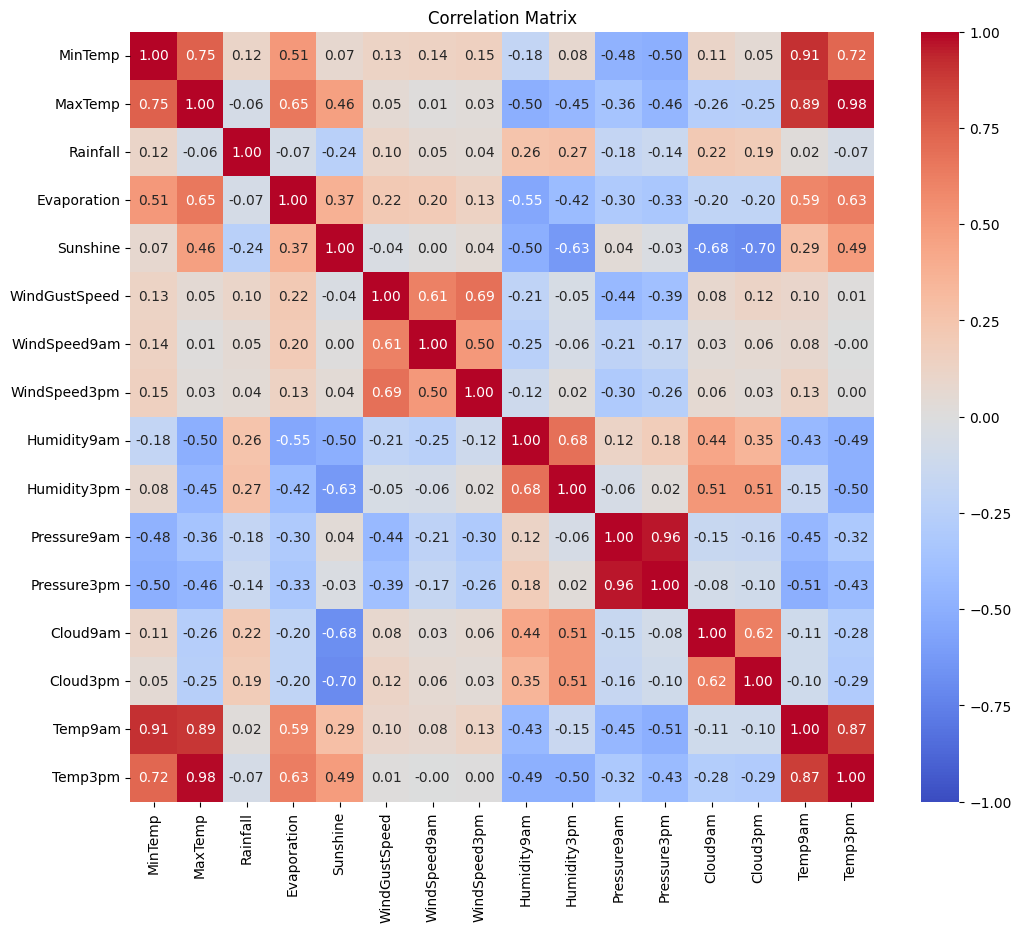

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# CSVファイルを読み込む
uploaded = files.upload()
data_base = pd.read_csv('no_loss_test_train_all.csv')

# データの欠損値を確認（欠損値があると相関計算に影響するので、適切に処理する必要があります）
# 簡便のために、ここではdropnaを使って欠損値を含む行を削除しますが、他の方法（補間や別処置）もあります

# data = data_base[[X_test = test_data[['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]]]
data = data_base[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]
data_cleaned = data.dropna()
correlation_matrix = data_cleaned.corr()

# 目的変数との相関を取得
correlation_with_target = correlation_matrix['Humidity9am'].drop('Humidity9am').sort_values(ascending=False)

# 相関が強い順に表示
print("目的変数 'Humidity9am' との相関が強い説明変数:")
print(correlation_with_target)

# 相関行列のヒートマップを描画する
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# yes相関

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

# CSVファイルを読み込む
uploaded = files.upload()
df = pd.read_csv('int_no_loss.csv')

# RainTomorrowが1の時のデータを抽出
rain_tomorrow_1 = df[df['RainTomorrow'] == 1]

rain_tomorrow_1_info = rain_tomorrow_1.describe()
print("RainTomorrowが1の時のデータの統計情報:\n", rain_tomorrow_1_info)

rain_tomorrow_1_count = rain_tomorrow_1.count()
print("\n各カラムの非欠損値の数:", rain_tomorrow_1_count)

RainTomorrowが1の時のデータの統計情報:
            MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  7396.000000  7396.000000  7396.000000  7396.000000  7396.000000   
mean     14.503759    22.354557     5.498134     4.612399     4.608072   
std       6.478201     6.861033    11.589766     3.138174     3.385075   
min      -4.700000     7.200000     0.000000     0.000000     0.000000   
25%       9.200000    16.900000     0.000000     2.200000     1.500000   
50%      14.000000    21.500000     0.800000     4.000000     4.500000   
75%      19.800000    27.900000     5.800000     6.400000     7.225000   
max      29.100000    46.400000   183.000000    43.000000    13.800000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    7396.000000   7396.000000   7396.000000  7396.000000  7396.000000   
mean       46.892239     16.974040     21.357220    75.248648    66.585452   
std        15.473859      8.967442      9.342251    15.758942    18.702

# 多数決12/23

In [ ]:
import pandas as pd
from collections import Counter
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# CSVファイルを読み込む
uploaded = files.upload()
file1 = 'tennki_pred2.csv'
file2 = 'kakou_1212_model4_notest_theme2_randomforest_result.csv'
file3 = 'Theme2_kaku_submit_KFold_r2.csv'

# 各ファイルのデータをDataFrameに読み込む。列名を指定（0番目の列がサンプルID、1番目の列が予測）
df1 = pd.read_csv(file1, header=None, names=['SampleID', 'Prediction'])
df2 = pd.read_csv(file2, header=None, names=['SampleID', 'Prediction'])
df3 = pd.read_csv(file3, header=None, names=['SampleID', 'Prediction'])

# 結果を保存するためのリスト
ensemble_results = []

# 各行について多数決を行う
for i in range(len(df1)):
    # 各モデルの予測を取得
    prediction1 = df1.at[i, 'Prediction']
    prediction2 = df2.at[i, 'Prediction']
    prediction3 = df3.at[i, 'Prediction']

    # カウンターで最頻値（多数決）を取得
    votes = [prediction1, prediction2, prediction3]
    most_common_prediction = Counter(votes).most_common(1)[0][0]

    # 結果をリストに追加（サンプルIDと予測結果のペア）
    sample_id = df1.at[i, 'SampleID']
    ensemble_results.append((sample_id, most_common_prediction))

# データフレームに変換
ensemble_df = pd.DataFrame(ensemble_results, columns=['SampleID', 'Prediction'])

# 結果をCSVに保存
ensemble_df.to_csv('oyapred2_naka_kaku_tasuuketu.csv', index=False)

# 異常データ修正(最低気温)

In [ ]:
import pandas as pd
from collections import Counter
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# CSVファイルを読み込む
uploaded = files.upload()
df = pd.read_csv('imputed_Date_chg_int_windDir_rm_moji_conv_train.csv')

# デバッグ用: 元のデータフレームの表示
# print("Before adjustment:")
# print(df)

# Temp9amとTemp3pmの値を比較し、低い方のカラムを選択
mask_9am_lower = (df['Temp9am'] < df['Temp3pm']) & (df['Temp9am'] < df['MinTemp'])
mask_3pm_lower = (df['Temp3pm'] <= df['Temp9am']) & (df['Temp3pm'] < df['MinTemp'])

# MinTempがそれぞれより低い場合に値を更新
df.loc[mask_9am_lower, 'Temp9am'] = df['MinTemp']
df.loc[mask_3pm_lower, 'Temp3pm'] = df['MinTemp']

# デバッグ用: 調整後のデータフレームの表示
# print("\nAfter adjustment:")
# print(df)

# 必要に応じて、新しいCSVファイルに保存
df.to_csv('min_conv_imputed_Date_chg_int_windDir_rm_moji_conv_train.csv', index=False)
files.download('min_conv_imputed_Date_chg_int_windDir_rm_moji_conv_train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 異常データ修正(最高気温)

In [ ]:
import pandas as pd
from collections import Counter
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# CSVファイルを読み込む
uploaded = files.upload()
df = pd.read_csv('min_conv_imputed_Date_chg_int_windDir_rm_moji_conv_train.csv')

# デバッグ用: 元のデータフレームの表示
# print("Before adjustment:")
# print(df)

# Temp9amとTemp3pmの値を比較し、高い方のカラムを選択
mask_9am_higher = (df['Temp9am'] >= df['Temp3pm']) & (df['Temp9am'] > df['MaxTemp'])
mask_3pm_higher = (df['Temp3pm'] > df['Temp9am']) & (df['Temp3pm'] > df['MaxTemp'])

# MaxTempがそれぞれの高い値より小さい場合に値を更新
df.loc[mask_9am_higher, 'Temp9am'] = df['MaxTemp']
df.loc[mask_3pm_higher, 'Temp3pm'] = df['MaxTemp']


# デバッグ用: 調整後のデータフレームの表示
# print("\nAfter adjustment:")
# print(df)

# 必要に応じて、新しいCSVファイルに保存
df.to_csv('temp_conv_imputed_Date_chg_int_windDir_rm_moji_conv_train.csv', index=False)
files.download('temp_conv_imputed_Date_chg_int_windDir_rm_moji_conv_train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ランダムフォレスト再検討(気温更新)

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files


# 訓練用データを読み込む
# uploaded = files.upload()
train_data = pd.read_csv('temp_conv_imputed_Date_chg_int_windDir_rm_moji_conv_train.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。

# Test Accuracy: 0.8562
X = train_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
# Test Accuracy: 0.8562
# X = train_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
# Test Accuracy: 0.8563
# X = train_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
# Test Accuracy: 0.8548
# X = train_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# 最適なハイパーパラメータを使用してランダムフォレストモデルを構築
best_rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=25,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# モデルの訓練
best_rf_model.fit(X_train, y_train)

# 全データで学習
# best_rf_model.fit(X, y)

# モデルを保存する
# model_filename = 'conv_no_test_theme2_randomforest_model.joblib'
# joblib.dump(model, model_filename)
# データの保存
# files.download('conv_no_test_theme2_randomforest_model.joblib')

# テストデータで予測
y_pred = best_rf_model.predict(X_test)

# 予測精度の評価
accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy: {accuracy:.4f}")

ValueError: could not convert string to float: '2013/7/12'

# 蛮族をデータ加工(平均化)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# データの読み込み
uploaded = files.upload()
df = pd.read_csv('Del_blank_All_combin.csv')

# SimpleImputerのインスタンスを作成（この例では列の平均で補完）
imputer = SimpleImputer(strategy='mean')

# 補完を適用
# 数値データが対象となるため、数値列のみを取得
numeric_cols = df.select_dtypes(include=[np.number]).columns
imputed_data = imputer.fit_transform(df[numeric_cols])

# 小数第1位以降を切り捨て
imputed_data_truncated = np.floor(imputed_data * 10) / 10

# 補完したデータを新しいデータフレームに挿入
df[numeric_cols] = imputed_data_truncated

# 補完後のデータを新しいCSVファイルとして保存
df.to_csv('imputed_Del_blank_All_combin.csv', index=False)

# ダウンロードする
files.download('imputed_Del_blank_All_combin.csv')

Saving Del_blank_All_combin.csv to Del_blank_All_combin.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 蛮族異常データ修正(最低気温)

In [ ]:
import pandas as pd
from collections import Counter
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# CSVファイルを読み込む
uploaded = files.upload()
df = pd.read_csv('imputed_Del_blank_All_combin.csv')

# デバッグ用: 元のデータフレームの表示
# print("Before adjustment:")
# print(df)

# Temp9amとTemp3pmの値を比較し、低い方のカラムを選択
mask_9am_lower = (df['Temp9am'] < df['Temp3pm']) & (df['Temp9am'] < df['MinTemp'])
mask_3pm_lower = (df['Temp3pm'] <= df['Temp9am']) & (df['Temp3pm'] < df['MinTemp'])

# MinTempがそれぞれより低い場合に値を更新
df.loc[mask_9am_lower, 'Temp9am'] = df['MinTemp']
df.loc[mask_3pm_lower, 'Temp3pm'] = df['MinTemp']

# デバッグ用: 調整後のデータフレームの表示
# print("\nAfter adjustment:")
# print(df)

# 必要に応じて、新しいCSVファイルに保存
df.to_csv('min_upd_imputed_Del_blank_All_combin.csv', index=False)
files.download('min_upd_imputed_Del_blank_All_combin.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 蛮族異常データ修正(最高気温)

In [ ]:
import pandas as pd
from collections import Counter
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# CSVファイルを読み込む
uploaded = files.upload()
df = pd.read_csv('min_upd_imputed_Del_blank_All_combin.csv')

# デバッグ用: 元のデータフレームの表示
# print("Before adjustment:")
# print(df)

# Temp9amとTemp3pmの値を比較し、高い方のカラムを選択
mask_9am_higher = (df['Temp9am'] >= df['Temp3pm']) & (df['Temp9am'] > df['MaxTemp'])
mask_3pm_higher = (df['Temp3pm'] > df['Temp9am']) & (df['Temp3pm'] > df['MaxTemp'])

# MaxTempがそれぞれの高い値より小さい場合に値を更新
df.loc[mask_9am_higher, 'Temp9am'] = df['MaxTemp']
df.loc[mask_3pm_higher, 'Temp3pm'] = df['MaxTemp']


# デバッグ用: 調整後のデータフレームの表示
# print("\nAfter adjustment:")
# print(df)

# 必要に応じて、新しいCSVファイルに保存
df.to_csv('temp_upd_imputed_Del_blank_All_combin.csv', index=False)
files.download('temp_upd_imputed_Del_blank_All_combin.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 蛮族_地域を数値化

In [ ]:
import joblib
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from google.colab import files

# 例としてデータロードとモデル訓練を行います
uploaded = files.upload()

# CSVファイルをロード
df = pd.read_csv('temp_upd_imputed_Del_blank_All_combin.csv', dtype=str)

# 変換ルールを定義
# 分けた方が良さそうだが一旦ひとまとめ
# 16方位は西から東に流れると想定して数値にしている。
# 都市は一旦出てきた順
conversion_map = {
    'Albury': 1,
    'Cobar': 2,
    'CoffsHarbour': 3,
    'Moree': 4,
    'NorfolkIsland': 5,
    'Richmond': 6,
    'Sydney': 7,
    'SydneyAirport': 8,
    'WaggaWagga': 9,
    'Williamtown': 10,
    'Wollongong': 11,
    'Canberra': 12,
    'Ballarat': 13,
    'Bendigo': 14,
    'Sale': 15,
    'MelbourneAirport': 16,
    'Melbourne': 17,
    'Mildura': 18,
    'Portland': 19,
    'Watsonia': 20,
    'Brisbane': 21,
    'Cairns': 22,
    'Townsville': 23,
    'MountGambier': 24,
    'Nuriootpa': 25,
    'Woomera': 26,
    'Albany': 27,
    'PearceRAAF': 28,
    'PerthAirport': 29,
    'Perth': 30,
    'Hobart': 31,
    'Launceston': 32,
    'AliceSprings': 33,
    'Darwin': 34,
    'Katherine': 35,
    'Uluru': 36,
    # --- データ欠損見て追加 ---
    'BadgerysCreek': 37,
    'Newcastle': 38,
    'NorahHead': 39,
    'Penrith': 40,
    'Tuggeranong': 41,
    'MountGinini': 42,
    'Nhil': 43,
    'Dartmoor': 44,
    'GoldCoast': 45,
    'Adelaide': 46,
    'Witchcliffe': 47,
    'SalmonGums': 48,
    'Walpole': 49,
    # 北:N
    'N': 0,
    # 北北東:NNE
    'NNE': 5,
    # 北東:NE
    'NE': 6,
    # 東北東:ENE
    'ENE': 7,
    # 東:E
    'E': 8,
    # 東南東:ESE
    'ESE': 7,
    # 南東:SE
    'SE': 6,
    # 南南東:SSE
    'SSE': 5,
    # 南:S
    'S': 0,
    # 南南西:SSW
    'SSW': 4,
    # 南西:SW
    'SW': 3,
    # 西南西:WSW
    'WSW': 2,
    # 西:W
    'W': 1,
    # 西北西:WNW
    'WNW': 2,
    # 北西:NW
    'NW': 3,
    # 北北西:NNW
    'NNW': 4
}

# 貿易風、偏西風、モンスーンは想定してないので
# 基本は西から東に流れる想定
# 本来北と南は弄った方が良いかもしれないが一旦0にしておく
direction_map = {
    # 北:N
    'N': 0,
    # 北北東:NNE
    'NNE': 5,
    # 北東:NE
    'NE': 6,
    # 東北東:ENE
    'ENE': 7,
    # 東:E
    'E': 8,
    # 東南東:ESE
    'ESE': 7,
    # 南東:SE
    'SE': 6,
    # 南南東:SSE
    'SSE': 5,
    # 南:S
    'S': 0,
    # 南南西:SSW
    'SSW': 4,
    # 南西:SW
    'SW': 3,
    # 西南西:WSW
    'WSW': 2,
    # 西:W
    'W': 1,
    # 西北西:WNW
    'WNW': 2,
    # 北西:NW
    'NW': 3,
    # 北北西:NNW
    'NNW': 4
}


# 3カラム目（通常はインデックス2）を条件に基づいて変換
column_index = 2  # ここを変えれば別のカラムを指定できます

def convert_value(value):
    try:
        # もともと数字の場合はそのまま返す
        return int(value)
    except ValueError:
        # 変換マップで指定されている値ならマップの値を、それ以外なら52を返す
        # 変換外の異常値はWindDir3pmも連番と考えた場合の範囲外値
        return conversion_map.get(value, 52)

# 3カラム目と8カラム目のみに変換を適用する
columns_to_convert = [2]

for index in columns_to_convert:
    df.iloc[:, index] = df.iloc[:, index].apply(convert_value)


# RainTodayを0,1変換
df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)

# 変換後のデータフレームを表示
# print(df)

# 必要に応じて、新しいCSVファイルに保存
df.to_csv('int_temp_upd_imputed_Del_blank_All_combin.csv', index=False)
files.download('int_temp_upd_imputed_Del_blank_All_combin.csv')

<ipython-input-26-4679767f7181>:161: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainToday'] = df['RainToday'].replace({'No': 0, 'Yes': 1}).astype(int)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ランダムフォレスト_蛮族情報追加型

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files


# 訓練用データを読み込む
uploaded = files.upload()
train_data = pd.read_csv('del_id_date_sort_int_temp_upd_imputed_Del_blank_All_combin.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。

# Test Accuracy: 0.8562
X = train_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# 最適なハイパーパラメータを使用してランダムフォレストモデルを構築
best_rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=25,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# モデルの訓練
best_rf_model.fit(X_train, y_train)

# 全データで学習
# best_rf_model.fit(X, y)

# モデルを保存する
# model_filename = 'conv_no_test_theme2_randomforest_model.joblib'
# joblib.dump(model, model_filename)
# データの保存
# files.download('conv_no_test_theme2_randomforest_model.joblib')

# テストデータで予測
y_pred = best_rf_model.predict(X_test)

# 予測精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

Saving del_id_date_sort_int_temp_upd_imputed_Del_blank_All_combin.csv to del_id_date_sort_int_temp_upd_imputed_Del_blank_All_combin.csv
Test Accuracy: 0.8613


# 角野システムの設定値参照

In [ ]:
# !pip install pandas scikit-learn tensorflow
# !pip install --upgrade jax jaxlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# データの読み込み
uploaded = files.upload()
data = pd.read_csv('del_id_date_sort_int_temp_upd_imputed_Del_blank_All_combin.csv')
# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を指定
X = data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
# X = data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
y = data['RainTomorrow']


# カテゴリ変数のエンコード
# encoder = LabelEncoder()
# X['Location'] = encoder.fit_transform(X['Location'])

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 二値目的変数のエンコード
# y_encoded = encoder.fit_transform(y)
# y_categorical = np_utils.to_categorical(y_encoded)  # yをone-hotエンコーディング

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# one-hotエンコーディングの適用
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


#-----------------------
# モデルの構築
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.1))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))  # ドロップアウトで30%のユニットをランダムに無効化

# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(y_train.shape[1], activation='softmax'))

# モデルのコンパイル
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# モデルの訓練
model.fit(X_train, y_train, epochs=25, batch_size=128, validation_split=0.1, verbose=1)
# モデルの保存
# model.save('512_256_128_sigmoid_ep25_ba128.h5')

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
632/632 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7895 - loss: 0.4387 - val_accuracy: 0.8437 - val_loss: 0.3581
Epoch 2/25
632/632 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8418 - loss: 0.3682 - val_accuracy: 0.8453 - val_loss: 0.3527
Epoch 3/25
632/632 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8464 - loss: 0.3575 - val_accuracy: 0.8464 - val_loss: 0.3507
Epoch 4/25
632/632 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8461 - loss: 0.3566 - val_accuracy: 0.8476 - val_loss: 0.3486
Epoch 5/25
632/632 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8492 - loss: 0.3522 - val_accuracy: 0.8489 - val_loss: 0.3459
Epoch 6/25
632/632 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8508 - loss: 0.3489 - val_accuracy: 0.8480 - val_loss: 0.3477
Epoch 7/25
632/632 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8472 - loss: 0.3503 - val_accuracy: 0.8486 - val_loss: 0.3488
Epoch 8/25
632/632 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8483 - loss: 0.3514 - val_accuracy: 0.

# 現状これが一番精度良い

In [ ]:
# !pip install pandas scikit-learn tensorflow
# !pip install --upgrade jax jaxlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# データの読み込み
# uploaded = files.upload()
data = pd.read_csv('del_id_date_sort_int_temp_upd_imputed_Del_blank_All_combin.csv')
# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を指定
X = data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
y = data['RainTomorrow']


# カテゴリ変数のエンコード
# encoder = LabelEncoder()
# X['Location'] = encoder.fit_transform(X['Location'])

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 二値目的変数のエンコード
# y_encoded = encoder.fit_transform(y)
# y_categorical = np_utils.to_categorical(y_encoded)  # yをone-hotエンコーディング

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# one-hotエンコーディングの適用
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# モデルの構築
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(y_train.shape[1], activation='sigmoid'))

# モデルのコンパイル
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# モデルの訓練
model.fit(X_train, y_train, epochs=25, batch_size=128, validation_split=0.1, verbose=1)
# モデルの保存
# model.save('512_256_128_sigmoid_ep25_ba128.h5')

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
711/711 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8165 - loss: 0.4164 - val_accuracy: 0.8504 - val_loss: 0.3439
Epoch 2/25
711/711 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8427 - loss: 0.3678 - val_accuracy: 0.8508 - val_loss: 0.3426
Epoch 3/25
711/711 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8476 - loss: 0.3613 - val_accuracy: 0.8526 - val_loss: 0.3395
Epoch 4/25
711/711 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8486 - loss: 0.3547 - val_accuracy: 0.8483 - val_loss: 0.3436
Epoch 5/25
711/711 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8487 - loss: 0.3533 - val_accuracy: 0.8542 - val_loss: 0.3365
Epoch 6/25
711/711 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8503 - loss: 0.3509 - val_accuracy: 0.8548 - val_loss: 0.3352
Epoch 7/25
711/711 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8477 - loss: 0.3528 - val_accuracy: 0.8538 - val_loss: 0.3360
Epoch 8/25
711/711 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8488 - loss: 0.3525 - val_acc

# k-fold

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# データの読み込み
uploaded = files.upload()
data = pd.read_csv('del_id_date_sort_int_temp_upd_imputed_Del_blank_All_combin.csv')

# 説明変数と目的変数を指定
X = data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
          'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
          'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]

y = data['RainTomorrow']

# 'RainToday' と 'RainTomorrow' のエンコーディング
X['RainToday'] = LabelEncoder().fit_transform(X['RainToday'])
y = LabelEncoder().fit_transform(y)

# 'Date' や 'Location' などのカテゴリ変数をエンコードする（OneHotEncoderが適当だが、ここでは簡易化）
X['Location'] = LabelEncoder().fit_transform(X['Location'])

# 数値データのスケーリング
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# kを設定
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# k-fold cross validation
fold_no = 1
for train_index, val_index in skf.split(X_scaled, y):
    print(f'Training fold {fold_no}...')

    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]

    y_train_onehot = to_categorical(y_train, num_classes=2)
    y_val_onehot = to_categorical(y_val, num_classes=2)

    # モデルの構造を定義する
    model = Sequential([
        Dense(512, input_dim=X_train.shape[1], activation='relu'),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dropout(0.3),
        Dense(2, activation='sigmoid')
    ])

    # モデルをコンパイル
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    # モデルの訓練
    model.fit(X_train, y_train_onehot, epochs=25, batch_size=128, validation_data=(X_val, y_val_onehot))

    # 評価
    scores = model.evaluate(X_val, y_val_onehot, verbose=0)
    print(f'Fold {fold_no} - Loss: {scores[0]} - Accuracy: {scores[1]}')

    fold_no += 1

<ipython-input-15-10044640068c>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['RainToday'] = LabelEncoder().fit_transform(X['RainToday'])
<ipython-input-15-10044640068c>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Location'] = LabelEncoder().fit_transform(X['Location'])
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the f

Training fold 1...
Epoch 1/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8276 - loss: 0.3984 - val_accuracy: 0.8504 - val_loss: 0.3535
Epoch 2/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8471 - loss: 0.3624 - val_accuracy: 0.8502 - val_loss: 0.3464
Epoch 3/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8489 - loss: 0.3571 - val_accuracy: 0.8508 - val_loss: 0.3431
Epoch 4/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8484 - loss: 0.3544 - val_accuracy: 0.8505 - val_loss: 0.3414
Epoch 5/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8498 - loss: 0.3527 - val_accuracy: 0.8535 - val_loss: 0.3410
Epoch 6/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8499 - loss: 0.3519 - val_accuracy: 0.8526 - val_loss: 0.3391
Epoch 7/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.8490 - loss: 0.3481 - val_accuracy: 0.8520 - val_loss: 0.3406
Epoch 8/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8520 - lo

# RNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# データの読み込み
data = pd.read_csv('del_id_date_sort_int_temp_upd_imputed_Del_blank_All_combin.csv')

# 説明変数と目的変数を指定
X = data[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
          'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
          'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']]

y = data['RainTomorrow']

# 数値データのスケーリング
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# LSTMの入力形式に変換 (samples, time_steps, features)
X_scaled = np.expand_dims(X_scaled, axis=1)

# kを設定
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# 早期停止のコールバック
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# k-fold cross validation
fold_no = 1
for train_index, val_index in skf.split(X_scaled, y):
    print(f'Training fold {fold_no}...')

    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train, y_val = y[train_index], y[val_index]

    y_train_onehot = to_categorical(y_train, num_classes=2)
    y_val_onehot = to_categorical(y_val, num_classes=2)

    # モデルの構造を定義する
    model = Sequential([
        LSTM(512, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(16, activation='relu'),
        Dropout(0.3),
        Dense(2, activation='softmax')  # 出力層
    ])

    # モデルをコンパイル
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    # モデルの訓練
    model.fit(X_train, y_train_onehot, epochs=25, batch_size=128, validation_data=(X_val, y_val_onehot),
              callbacks=[early_stopping], verbose=1)

    # 評価
    scores = model.evaluate(X_val, y_val_onehot, verbose=0)
    print(f'Fold {fold_no} - Loss: {scores[0]} - Accuracy: {scores[1]}')

    fold_no += 1

Training fold 1...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.8269 - loss: 0.4049 - val_accuracy: 0.8498 - val_loss: 0.3521
Epoch 2/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.8438 - loss: 0.3672 - val_accuracy: 0.8491 - val_loss: 0.3492
Epoch 3/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.8460 - loss: 0.3618 - val_accuracy: 0.8494 - val_loss: 0.3487
Epoch 4/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 45s 58ms/step - accuracy: 0.8478 - loss: 0.3580 - val_accuracy: 0.8507 - val_loss: 0.3463
Epoch 5/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 37s 52ms/step - accuracy: 0.8484 - loss: 0.3541 - val_accuracy: 0.8515 - val_loss: 0.3439
Epoch 6/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.8501 - loss: 0.3514 - val_accuracy: 0.8519 - val_loss: 0.3409
Epoch 7/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.8498 - loss: 0.3513 - val_accuracy: 0.8523 - val_loss: 0.3410
Epoch 8/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 37s 53ms/step - accuracy: 0.8480 - loss: 0.3559 - 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.8245 - loss: 0.4316 - val_accuracy: 0.8448 - val_loss: 0.3600
Epoch 2/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.8451 - loss: 0.3715 - val_accuracy: 0.8461 - val_loss: 0.3559
Epoch 3/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.8455 - loss: 0.3657 - val_accuracy: 0.8478 - val_loss: 0.3504
Epoch 4/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.8476 - loss: 0.3604 - val_accuracy: 0.8490 - val_loss: 0.3537
Epoch 5/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 37s 52ms/step - accuracy: 0.8465 - loss: 0.3601 - val_accuracy: 0.8506 - val_loss: 0.3488
Fold 2 - Loss: 0.36000287532806396 - Accuracy: 0.8448483347892761
Training fold 3...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.8315 - loss: 0.4031 - val_accuracy: 0.8479 - val_loss: 0.3514
Epoch 2/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.8465 - loss: 0.3673 - val_accuracy: 0.8492 - val_loss: 0.3446
Epoch 3/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - accuracy: 0.8451 - loss: 0.3625 - val_accuracy: 0.8472 - val_loss: 0.3516
Epoch 4/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.8483 - loss: 0.3567 - val_accuracy: 0.8512 - val_loss: 0.3416
Epoch 5/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 37s 53ms/step - accuracy: 0.8497 - loss: 0.3534 - val_accuracy: 0.8525 - val_loss: 0.3410
Fold 3 - Loss: 0.35144758224487305 - Accuracy: 0.8479219675064087
Training fold 4...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.8318 - loss: 0.3997 - val_accuracy: 0.8509 - val_loss: 0.3516
Epoch 2/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 38s 53ms/step - accuracy: 0.8438 - loss: 0.3694 - val_accuracy: 0.8532 - val_loss: 0.3448
Epoch 3/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.8450 - loss: 0.3604 - val_accuracy: 0.8535 - val_loss: 0.3428
Epoch 4/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 40s 52ms/step - accuracy: 0.8459 - loss: 0.3586 - val_accuracy: 0.8533 - val_loss: 0.3442
Epoch 5/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.8458 - loss: 0.3578 - val_accuracy: 0.8543 - val_loss: 0.3404
Fold 4 - Loss: 0.35161343216896057 - Accuracy: 0.850906491279602
Training fold 5...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.8315 - loss: 0.4007 - val_accuracy: 0.8466 - val_loss: 0.3523
Epoch 2/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 37s 52ms/step - accuracy: 0.8475 - loss: 0.3622 - val_accuracy: 0.8481 - val_loss: 0.3495
Epoch 3/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - accuracy: 0.8496 - loss: 0.3552 - val_accuracy: 0.8467 - val_loss: 0.3501
Epoch 4/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.8487 - loss: 0.3546 - val_accuracy: 0.8482 - val_loss: 0.3499
Epoch 5/25
702/702 ━━━━━━━━━━━━━━━━━━━━ 42s 55ms/step - accuracy: 0.8488 - loss: 0.3558 - val_accuracy: 0.8489 - val_loss: 0.3466
Fold 5 - Loss: 0.35229331254959106 - Accuracy: 0.8466301560401917


# アンダーサンプリング

In [ ]:
# !pip install pandas scikit-learn tensorflow
# !pip install --upgrade jax jaxlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# データの読み込み
uploaded = files.upload()
data = pd.read_csv('under_sample_del_id_date_sort_int_temp_upd_imputed_Del_blank_All_combin.csv')
# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# data['RainTomorrow'] = data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を指定
X = data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
y = data['RainTomorrow']


# カテゴリ変数のエンコード
# encoder = LabelEncoder()
# X['Location'] = encoder.fit_transform(X['Location'])

# 標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 二値目的変数のエンコード
# y_encoded = encoder.fit_transform(y)
# y_categorical = np_utils.to_categorical(y_encoded)  # yをone-hotエンコーディング

# データを訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# one-hotエンコーディングの適用
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# モデルの構築
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))  # ドロップアウトで30%のユニットをランダムに無効化

model.add(Dense(y_train.shape[1], activation='sigmoid'))

# モデルのコンパイル
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# モデルの訓練
model.fit(X_train, y_train, epochs=25, batch_size=128, validation_split=0.1, verbose=1)
# モデルの保存
model.save('under_sample_512_256_64_16_sigmoid_ep25_ba128.h5')

# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.7027 - loss: 0.5238 - val_accuracy: 0.8535 - val_loss: 0.2951
Epoch 2/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8476 - loss: 0.3228 - val_accuracy: 0.8611 - val_loss: 0.2758
Epoch 3/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8599 - loss: 0.3010 - val_accuracy: 0.8578 - val_loss: 0.2770
Epoch 4/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8636 - loss: 0.2925 - val_accuracy: 0.8696 - val_loss: 0.2736
Epoch 5/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8613 - loss: 0.2923 - val_accuracy: 0.8627 - val_loss: 0.2666
Epoch 6/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8702 - loss: 0.2818 - val_accuracy: 0.8663 - val_loss: 0.2671
Epoch 7/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8697 - loss: 0.2802 - val_accuracy: 0.8647 - val_loss: 0.2634
Epoch 8/25
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8731 - loss: 0.2710 - val_accura

106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8715 - loss: 0.2577
Test Accuracy: 0.8703


# アンダーサンプリングランダムフォレスト

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files


# 訓練用データを読み込む
uploaded = files.upload()
train_data = pd.read_csv('under_sample_del_id_date_sort_int_temp_upd_imputed_Del_blank_All_combin.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。

# Test Accuracy: 0.8562
X = train_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# 最適なハイパーパラメータを使用してランダムフォレストモデルを構築
best_rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=25,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# モデルの訓練
best_rf_model.fit(X_train, y_train)

# 全データで学習
# best_rf_model.fit(X, y)

# モデルを保存する
model_filename = '1225_under_sample_test_size0.1_theme2_randomforest_model.joblib'
joblib.dump(best_rf_model, model_filename)
# データの保存
files.download('1225_under_sample_test_size0.1_theme2_randomforest_model.joblib')

# テストデータで予測
y_pred = best_rf_model.predict(X_test)

# 予測精度の評価
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Test Accuracy: 0.8800


# アンダーサンプリングランダムフォレストモデル(全データモデル)

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files


# 訓練用データを読み込む
uploaded = files.upload()
train_data = pd.read_csv('under_sample_del_id_date_sort_int_temp_upd_imputed_Del_blank_All_combin.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。


X = train_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
y = train_data['RainTomorrow']

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# 最適なハイパーパラメータを使用してランダムフォレストモデルを構築
best_rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=25,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# 全データで学習
best_rf_model.fit(X, y)

# モデルを保存する
model_filename = '1225_under_notest_theme2_randomforest_model.joblib'
joblib.dump(best_rf_model, model_filename)
# データの保存
files.download('1225_under_notest_theme2_randomforest_model.joblib')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# アンダーサンプリングモデルで評価

In [ ]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files

# 保存されたモデルを読み込む
uploaded = files.upload()
model_filename = '1225_under_notest_theme2_randomforest_model.joblib'
model = joblib.load(model_filename)

# 評価用データを読み込む
test_file = 'id_plus_imputed_Date_chg_int_windDir_rm_moji_conv_test.csv'
test_data = pd.read_csv(test_file, header=0)

# 2行目から説明変数を取得
X = test_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]

#-----
# Original_Value列が1次元か確認
original_values = test_data.iloc[:, 0].values
print("Original_Valueのshape:", original_values.shape)
if len(original_values.shape) == 1:
    print("Original_Valueは1次元です。")
else:
    print("Original_Valueは1次元ではありません。")

# Predicted列が1次元か確認
# もし model_predictions が2次元であれば、フラット化が必要

# 予測を行う
predictions = model.predict(X)

predicted_values = predictions
print("Predictedのshape:", predicted_values.shape)
if len(predicted_values.shape) == 1:
    print("Predictedは1次元です。")
else:
    print("Predictedは1次元ではありません。フラット化します。")
    predicted_values = predicted_values.flatten()

# 出力結果のDataFrameを作成（1次元に変換済み）
output = pd.DataFrame({
    'Original_Value': original_values,
    'Predicted': predicted_values
})

print(output.head())
#-----

# 予測を行う
# predictions = model.predict(X)

# 出力結果のDataFrameを作成
output = pd.DataFrame({
    'Original_Value': test_data.iloc[0:, 0].values,  # 1カラム目のデータ
    'Predicted': predictions  # モデルの予測値
})

# CSVファイルに出力
# CSVに保存（ヘッダー無し）
result_filename = '1225_under_sample_notest_theme2_randomforest_result.csv'
output.to_csv(result_filename, index=False, header=False)
print(f"Predictions saved to {result_filename}")
files.download('1225_under_sample_notest_theme2_randomforest_result.csv')

Original_Valueのshape: (28193,)
Original_Valueは1次元です。
882/882 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Predictedのshape: (28193, 2)
Predictedは1次元ではありません。フラット化します。


ValueError: All arrays must be of the same length

# デバッグ

In [ ]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files

# 保存されたモデルを読み込む
# uploaded = files.upload()
model_filename = '1225_under_notest_theme2_randomforest_model.joblib'
model = joblib.load(model_filename)

# 評価用データを読み込む
test_file = 'id_plus_imputed_Date_chg_int_windDir_rm_moji_conv_test.csv'
test_data = pd.read_csv(test_file, header=0)

# 2行目から説明変数を取得
X = test_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]

#-----
# Original_Value列が1次元か確認
original_values = test_data.iloc[:, 0].values
print("Original_Valueのshape:", original_values.shape)
if len(original_values.shape) == 1:
    print("Original_Valueは1次元です。")
else:
    print("Original_Valueは1次元ではありません。")

# Predicted列が1次元か確認
# もし model_predictions が2次元であれば、フラット化が必要

# 予測を行う
predictions = model.predict(X)

predicted_values = predictions
# 予測結果の次元と中身のデバッグ
print("Predictions shape:", predictions.shape)
print("Predictions content (first 10):\n", predictions[:10])


# もし予測が二次元であれば、フラット化する
if predictions.ndim > 1:
    print("Predictions are not 1-dimensional, flattening...")
    predictions = predictions.flatten()

print("Flattened predictions shape:", predictions.shape)
print("Flattened predictions content (first 10):\n", predictions[:10])



Original_Valueのshape: (28193,)
Original_Valueは1次元です。
882/882 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Predictions shape: (28193, 2)
Predictions content (first 10):
 [[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
Predictions are not 1-dimensional, flattening...
Flattened predictions shape: (56386,)
Flattened predictions content (first 10):
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]


# NGSさんに助けを求める

In [ ]:
import pandas as pd
import joblib

# 保存されたモデルをロードする
model_filename = '1225_under_notest_theme2_randomforest_model.joblib'
best_rf_model = joblib.load(model_filename)

# テスト用データを読み込む（ファイルを再度アップロードまたはパスを指定）
test_data_path = 'id_plus_imputed_Date_chg_int_windDir_rm_moji_conv_test.csv'
test_data = pd.read_csv(test_data_path)

# 必要な特徴量の選択
X_test_new = test_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                        'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                        'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
                        'RainToday']]

# モデルによる予測
predictions = best_rf_model.predict(X_test_new)

# 予測結果をテストデータに追加
test_data['RainTomorrow_Predicted'] = predictions

# 予測結果を確認（必要に応じて数行のみ表示）
print(test_data[['RainTomorrow_Predicted']].head())

# 結果をCSV形式で保存
output_filename = 'predictions.csv'
test_data.to_csv(output_filename, index=False)

# 結果のダウンロード（Google Colabの場合）
from google.colab import files
files.download(output_filename)

print(f"Predictions have been saved to {output_filename}")

882/882 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


ValueError: Expected a 1D array, got an array with shape (28193, 2)

# モデル4が再度できるか

In [ ]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files

# 保存されたモデルを読み込む
uploaded = files.upload()
model_filename = 'imputed_no_test_theme2_randomforest_model.joblib'
model = joblib.load(model_filename)

# 評価用データを読み込む
test_file = 'id_plus_imputed_Date_chg_int_windDir_rm_moji_conv_test.csv'
test_data = pd.read_csv(test_file, header=0)
### デバッグ
# print("---test_data---")
# print(test_data)

# 2行目から説明変数を取得
X_test = test_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
# X_test = test_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]

### デバッグ
# print("---X_test---")
# print(X_test)
# データが数値型であるか確認、必要に応じて変換する
# X_test = X_test.apply(pd.to_numeric, errors='coerce')

# 予測を行う
predictions = model.predict(X_test)

# 出力結果のDataFrameを作成
output = pd.DataFrame({
    'Original_Value': test_data.iloc[0:, 0].values,  # 1カラム目のデータ
    'Predicted': predictions  # モデルの予測値
})

# CSVファイルに出力
# CSVに保存（ヘッダー無し）
result_filename = '1225_model4_notest_theme2_randomforest_result.csv'
output.to_csv(result_filename, index=False, header=False)
print(f"Predictions saved to {result_filename}")
files.download('1225_model4_notest_theme2_randomforest_result.csv')

Saving id_plus_imputed_Date_chg_int_windDir_rm_moji_conv_test.csv to id_plus_imputed_Date_chg_int_windDir_rm_moji_conv_test (1).csv
Saving imputed_no_test_theme2_randomforest_model.joblib to imputed_no_test_theme2_randomforest_model.joblib


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.5.2 when using version 1.6.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Predictions saved to 1225_model4_notest_theme2_randomforest_result.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# アンダーサンプリングリトライ

In [ ]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files

# 保存されたモデルを読み込む
uploaded = files.upload()
model_filename = '1225_under_notest_theme2_randomforest_model.joblib'
model = joblib.load(model_filename)

# 評価用データを読み込む
test_file = 'id_plus_imputed_Date_chg_int_windDir_rm_moji_conv_test.csv'
test_data = pd.read_csv(test_file, header=0)
### デバッグ
# print("---test_data---")
# print(test_data)

# 2行目から説明変数を取得
X_test = test_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
# X_test = test_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]

### デバッグ
# print("---X_test---")
# print(X_test)
# データが数値型であるか確認、必要に応じて変換する
# X_test = X_test.apply(pd.to_numeric, errors='coerce')

# 予測を行う
predictions = model.predict(X_test)

# 出力結果のDataFrameを作成
output = pd.DataFrame({
    'Original_Value': test_data.iloc[0:, 0].values,  # 1カラム目のデータ
    'Predicted': predictions  # モデルの予測値
})

# CSVファイルに出力
# CSVに保存（ヘッダー無し）
result_filename = '1225_under_sample_notest_theme2_randomforest_result.csv'
output.to_csv(result_filename, index=False, header=False)
print(f"Predictions saved to {result_filename}")
files.download('1225_under_sample_notest_theme2_randomforest_result.csv')

Predictions saved to 1225_under_sample_notest_theme2_randomforest_result.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# test_sizeあり、アンダーサンプリングランダムフォレスト

In [ ]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files

# 保存されたモデルを読み込む
uploaded = files.upload()
model_filename = '1225_under_sample_test_size0.1_theme2_randomforest_model.joblib'
model = joblib.load(model_filename)

# 評価用データを読み込む
test_file = 'id_plus_imputed_Date_chg_int_windDir_rm_moji_conv_test.csv'
test_data = pd.read_csv(test_file, header=0)
### デバッグ
# print("---test_data---")
# print(test_data)

# 2行目から説明変数を取得
X_test = test_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]

# 予測を行う
predictions = model.predict(X_test)

# 出力結果のDataFrameを作成
output = pd.DataFrame({
    'Original_Value': test_data.iloc[0:, 0].values,  # 1カラム目のデータ
    'Predicted': predictions  # モデルの予測値
})

# CSVファイルに出力
# CSVに保存（ヘッダー無し）
result_filename = '1225_under_sample_test_size0.1_theme2_randomforest_result.csv'
output.to_csv(result_filename, index=False, header=False)
print(f"Predictions saved to {result_filename}")
files.download('1225_under_sample_test_size0.1_theme2_randomforest_result.csv')

Predictions saved to 1225_under_sample_test_size0.1_theme2_randomforest_result.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# DNN アンダーサンプリング

In [ ]:
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from google.colab import files
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.layers import LeakyReLU
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam



# CSVファイルからデータを読み込む
uploaded = files.upload()
data = pd.read_csv('imputed_Date_chg_int_windDir_rm_moji_conv_test.csv')

# 必要に応じてデータの前処理を行う
# ここでは標準化（Standard Scaling）を例にしています
scaler = StandardScaler()
X_test = scaler.fit_transform(data.values)  # assuming data is not labeled

# モデルのロード
model = load_model('under_sample_512_256_64_16_sigmoid_ep25_ba128.h5')

# モデルを使用して予測
predictions = model.predict(X_test)

# 予測結果を表示
# Softmaxの出力なので、各行で最大値のインデックスが予測クラス
predicted_classes = predictions.argmax(axis=1)

# 予測結果をデータフレームに変換
results_df = pd.DataFrame({
    'Predicted_Class': predicted_classes,
    'Prediction_Probabilities': [list(pred) for pred in predictions]  # 各サンプルのすべての確率を格納
})

# CSVファイルに出力
# CSVに保存（ヘッダー無し）
result_filename = '1225_DNN_under_sample_theme2_result.csv'
results_df.to_csv(result_filename, index=False, header=False)
print(f"Predictions saved to {result_filename}")
files.download('1225_DNN_under_sample_theme2_result.csv')

882/882 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Predictions saved to 1225_DNN_under_sample_theme2_result.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 再検討

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 訓練用データを読み込む
uploaded = files.upload()
train_data = pd.read_csv('del_id_date_sort_int_temp_upd_imputed_Del_blank_All_combin.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。

# Test Accuracy: 0.8562
X = train_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
y = train_data['RainTomorrow']

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# クラスウェイトの手動設定（例: 少数クラスのウエイトを0.5倍に設定）
manual_class_weight = {0: 4, 1: 0.5}

# 標準化（ランダムフォレストでは必ずしも必要ないが、他のモデルと一貫性を保つために実行することがあります）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ランダムフォレストモデルの構築
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=25,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# モデルの学習
rf_model.fit(X_train_scaled, y_train)

# モデルの予測
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# 評価指標の計算
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.8587
Precision: 0.7758
Recall: 0.5165
F1-Score: 0.6201
ROC-AUC: 0.8924


# 再検討_アンダーサンプリング

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 訓練用データを読み込む
uploaded = files.upload()
train_data = pd.read_csv('under_sample_del_id_date_sort_int_temp_upd_imputed_Del_blank_All_combin.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。

# Test Accuracy: 0.8562
X = train_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
y = train_data['RainTomorrow']

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
# クラスウェイトの手動設定（例: 少数クラスのウエイトを0.5倍に設定）
manual_class_weight = {0: 4, 1: 0.5}

# 標準化（ランダムフォレストでは必ずしも必要ないが、他のモデルと一貫性を保つために実行することがあります）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ランダムフォレストモデルの構築
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=25,
    class_weight=manual_class_weight,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# モデルの学習
rf_model.fit(X_train_scaled, y_train)

# モデルの予測
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# 評価指標の計算
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.8721
Precision: 0.9310
Recall: 0.8935
F1-Score: 0.9119
ROC-AUC: 0.9419


# 再検討_マニュアルウェイトアンダーサンプリング

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 訓練用データを読み込む
uploaded = files.upload()
train_data = pd.read_csv('under_sample_del_id_date_sort_int_temp_upd_imputed_Del_blank_All_combin.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。

# Test Accuracy: 0.8562
X = train_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
y = train_data['RainTomorrow']

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
# クラスウェイトの手動設定（例: 少数クラスのウエイトを0.5倍に設定）
manual_class_weight = {0: 1, 1: 3}

# 標準化（ランダムフォレストでは必ずしも必要ないが、他のモデルと一貫性を保つために実行することがあります）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ランダムフォレストモデルの構築
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=25,
    class_weight=manual_class_weight,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# モデルの学習
rf_model.fit(X_train_scaled, y_train)

# モデルの予測
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# 評価指標の計算
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.8741
Precision: 0.9236
Recall: 0.9049
F1-Score: 0.9141
ROC-AUC: 0.9440


# r2

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 訓練用データを読み込む
uploaded = files.upload()
train_data = pd.read_csv('under_sample_del_id_date_sort_int_temp_upd_imputed_Del_blank_All_combin.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。

# Test Accuracy: 0.8562
X = train_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
y = train_data['RainTomorrow']

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
# クラスウェイトの手動設定（例: 少数クラスのウエイトを0.5倍に設定）
manual_class_weight = {0: 1, 1: 9}

# 標準化（ランダムフォレストでは必ずしも必要ないが、他のモデルと一貫性を保つために実行することがあります）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ランダムフォレストモデルの構築
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=25,
    class_weight=manual_class_weight,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# モデルの学習
rf_model.fit(X_train_scaled, y_train)

# モデルの予測
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# 評価指標の計算
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.8684
Precision: 0.9081
Recall: 0.9149
F1-Score: 0.9115
ROC-AUC: 0.9398


# アンダーサンプリングランダムフォレストリトライ

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 訓練用データを読み込む
uploaded = files.upload()
train_data = pd.read_csv('under_sample_del_id_date_sort_int_temp_upd_imputed_Del_blank_All_combin.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。

# Test Accuracy: 0.8562
X = train_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
y = train_data['RainTomorrow']

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


# 標準化（ランダムフォレストでは必ずしも必要ないが、他のモデルと一貫性を保つために実行することがあります）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ランダムフォレストモデルの構築
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=25,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# モデルの学習
rf_model.fit(X_train_scaled, y_train)

# テストデータの読み込み
test_data = pd.read_csv('imputed_Date_chg_int_windDir_rm_moji_conv_test.csv')

# 特徴量の選択（学習用データと同じ特徴量を選択）
X_test_new = test_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
                        'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                        'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
                        'Temp3pm', 'RainToday']]

# データの標準化（学習時と同じスケーリングを適用）
X_test_scaled = scaler.transform(X_test_new)

# モデルによる予測
y_pred_test = rf_model.predict(X_test_scaled)

# 予測結果をDataFrameにして保存
result = pd.DataFrame({'Id': test_data.index, 'RainTomorrow_Predicted': y_pred_test})
result.to_csv('result.csv', index=False)

print("Predictions have been saved to result.csv")

Saving imputed_Date_chg_int_windDir_rm_moji_conv_test.csv to imputed_Date_chg_int_windDir_rm_moji_conv_test.csv
Predictions have been saved to result.csv


# アンダーサンプリンググリッドサーチ

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# 訓練用データを読み込む
uploaded = files.upload()
train_data = pd.read_csv('under_sample_del_id_date_sort_int_temp_upd_imputed_Del_blank_All_combin.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。

# Test Accuracy: 0.8562
X = train_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
y = train_data['RainTomorrow']

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


# 標準化（ランダムフォレストでは必ずしも必要ないが、他のモデルと一貫性を保つために実行することがあります）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ランダムフォレストモデルの構築
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=25,
    class_weight='balanced',
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# モデルの学習
rf_model.fit(X_train_scaled, y_train)

# モデルの予測
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# 評価指標の計算
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")


# ランダムフォレストモデルのインスタンス化
rf = RandomForestClassifier(random_state=42)

# グリッドサーチで探索するパラメータの設定
param_grid = {
    'n_estimators': [200,500,1000],
    'max_depth': [15,25,30,50],
    'min_samples_split': [2,5],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

# グリッドサーチオブジェクトの作成
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# グリッドサーチの実行
grid_search.fit(X_train_scaled, y_train)

# 最適なパラメータセットとそのスコアを出力
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# 最適なパラメータでテストデータに対する精度を計算
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test_scaled)
y_pred_best_proba = best_rf.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best, zero_division=0)
recall = recall_score(y_test, y_pred_best, zero_division=0)
f1 = f1_score(y_test, y_pred_best, zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_best_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.8758
Precision: 0.9202
Recall: 0.9113
F1-Score: 0.9158
ROC-AUC: 0.9445
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}
Best Cross-Validation Score: 0.8748593999059405
Accuracy: 0.8760
Precision: 0.9208
Recall: 0.9109
F1-Score: 0.9158
ROC-AUC: 0.9457


# r3 アンダーサンプリングウエイト調整

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 訓練用データを読み込む
uploaded = files.upload()
train_data = pd.read_csv('under_sample_del_id_date_sort_int_temp_upd_imputed_Del_blank_All_combin.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。

# Test Accuracy: 0.8562
X = train_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
y = train_data['RainTomorrow']

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# クラスウェイトの手動設定
manual_class_weight = {0: 1, 1: 3}

# 標準化（ランダムフォレストでは必ずしも必要ないが、他のモデルと一貫性を保つために実行することがあります）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ランダムフォレストモデルの構築
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=25,
    class_weight=manual_class_weight,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# モデルの学習
rf_model.fit(X_train_scaled, y_train)

# モデルの予測
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# 評価指標の計算
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.8719
Precision: 0.9278
Recall: 0.8972
F1-Score: 0.9122
ROC-AUC: 0.9416


# r3_size0.1 1:3アンダーサンプリングモデル作成

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 訓練用データを読み込む
uploaded = files.upload()
train_data = pd.read_csv('under_sample_del_id_date_sort_int_temp_upd_imputed_Del_blank_All_combin.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。

# Test Accuracy: 0.8562
X = train_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
y = train_data['RainTomorrow']

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# クラスウェイトの手動設定
manual_class_weight = {0: 1, 1: 3}

# 標準化（ランダムフォレストでは必ずしも必要ないが、他のモデルと一貫性を保つために実行することがあります）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ランダムフォレストモデルの構築
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=25,
    class_weight=manual_class_weight,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# モデルの学習
rf_model.fit(X_train_scaled, y_train)

# モデルを保存する
model_filename = '1226_under_weight1_3_test_0.1_theme2_randomforest_model.joblib'
joblib.dump(rf_model, model_filename)
# データの保存
files.download('1226_under_weight1_3_test_0.1_theme2_randomforest_model.joblib')

# モデルの予測
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# 評価指標の計算
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.8794
Precision: 0.9358
Recall: 0.8994
F1-Score: 0.9172
ROC-AUC: 0.9461


# r3 test評価

In [ ]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files

# 保存されたモデルを読み込む
uploaded = files.upload()
model_filename = '1226_under_weight1_3_test_0.1_theme2_randomforest_model.joblib'
model = joblib.load(model_filename)

# 評価用データを読み込む
test_file = 'id_plus_imputed_Date_chg_int_windDir_rm_moji_conv_test.csv'
test_data = pd.read_csv(test_file, header=0)
### デバッグ
# print("---test_data---")
# print(test_data)

# 2行目から説明変数を取得
X_test = test_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]

# 予測を行う
predictions = model.predict(X_test)

# 出力結果のDataFrameを作成
output = pd.DataFrame({
    'Original_Value': test_data.iloc[0:, 0].values,  # 1カラム目のデータ
    'Predicted': predictions  # モデルの予測値
})

# CSVファイルに出力
# CSVに保存（ヘッダー無し）
result_filename = '1226_under_weight1_3_test_0.1_theme2_randomforest_result.csv'
output.to_csv(result_filename, index=False, header=False)
print(f"Predictions saved to {result_filename}")
files.download('1226_under_weight1_3_test_0.1_theme2_randomforest_result.csv')

Saving id_plus_imputed_Date_chg_int_windDir_rm_moji_conv_test.csv to id_plus_imputed_Date_chg_int_windDir_rm_moji_conv_test.csv


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Predictions saved to 1226_under_weight1_3_test_0.1_theme2_randomforest_result.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# r4_size0.1 3:1アンダーサンプリングモデル作成

In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from google.colab import files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 訓練用データを読み込む
uploaded = files.upload()
train_data = pd.read_csv('under_sample_del_id_date_sort_int_temp_upd_imputed_Del_blank_All_combin.csv')

# データを確認
# print("Data Sample:")
# print(train_data.head())

# 必要に応じてデータを前処理（カテゴリ変数を数値化）
# train_data['RainTomorrow'] = train_data['RainTomorrow'].map({'Yes': 1, 'No': 0})

# 説明変数と目的変数を選択
# 具体的なカラム名はデータセットに応じて調整してください。

# Test Accuracy: 0.8562
X = train_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]
y = train_data['RainTomorrow']

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# クラスウェイトの手動設定
manual_class_weight = {0: 3, 1: 1}

# 標準化（ランダムフォレストでは必ずしも必要ないが、他のモデルと一貫性を保つために実行することがあります）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ランダムフォレストモデルの構築
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=25,
    class_weight=manual_class_weight,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# モデルの学習
rf_model.fit(X_train_scaled, y_train)

# モデルを保存する
model_filename = '1226_under_weight3_1_test_0.1_theme2_randomforest_model.joblib'
joblib.dump(rf_model, model_filename)
# データの保存
files.download('1226_under_weight3_1_test_0.1_theme2_randomforest_model.joblib')

# モデルの予測
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# 評価指標の計算
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Saving under_sample_del_id_date_sort_int_temp_upd_imputed_Del_blank_All_combin.csv to under_sample_del_id_date_sort_int_temp_upd_imputed_Del_blank_All_combin.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy: 0.8774
Precision: 0.9317
Recall: 0.9010
F1-Score: 0.9161
ROC-AUC: 0.9453


# r4 test評価

In [ ]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from google.colab import files

# 保存されたモデルを読み込む
uploaded = files.upload()
model_filename = '1226_under_weight3_1_test_0.1_theme2_randomforest_model.joblib'
model = joblib.load(model_filename)

# 評価用データを読み込む
test_file = 'id_plus_imputed_Date_chg_int_windDir_rm_moji_conv_test.csv'
test_data = pd.read_csv(test_file, header=0)
### デバッグ
# print("---test_data---")
# print(test_data)

# 2行目から説明変数を取得
X_test = test_data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']]

# 予測を行う
predictions = model.predict(X_test)

# 出力結果のDataFrameを作成
output = pd.DataFrame({
    'Original_Value': test_data.iloc[0:, 0].values,  # 1カラム目のデータ
    'Predicted': predictions  # モデルの予測値
})

# CSVファイルに出力
# CSVに保存（ヘッダー無し）
result_filename = '1226_under_weight3_1_test_0.1_theme2_randomforest_result.csv'
output.to_csv(result_filename, index=False, header=False)
print(f"Predictions saved to {result_filename}")
files.download('1226_under_weight3_1_test_0.1_theme2_randomforest_result.csv')

Saving id_plus_imputed_Date_chg_int_windDir_rm_moji_conv_test.csv to id_plus_imputed_Date_chg_int_windDir_rm_moji_conv_test.csv


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Predictions saved to 1226_under_weight3_1_test_0.1_theme2_randomforest_result.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 0117_XGBoost

In [10]:
import pandas as pd
from google.colab import files
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve

# データの読み込み
# 保存されたモデルを読み込む
uploaded = files.upload()
data = pd.read_csv('imputed_Date_chg_int_windDir_rm_moji_conv_train.csv')

# 説明変数と目的変数の分離
X = data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
          'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
          'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
          'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']].copy()
y = data['RainTomorrow'].copy()

# 必要であればカテゴリ変数を数値に変換
label_encoders = {}
for column in ['Location', 'RainToday']:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

# 目的変数をラベルエンコード
le_target = LabelEncoder()
y = le_target.fit_transform(y)

# スケーリング
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 正しいweightを設定するための計算
num_zeros = (y == 0).sum()
num_ones = (y == 1).sum()
scale_pos_weight = num_zeros / num_ones

# ストラティファイドk-分割交差検証（10分割を例にします）
skf = StratifiedKFold(n_splits=10)
accuracies = []

# optimal_thresholdsの初期化
optimal_thresholds = []

for train_index, test_index in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # XGBoostモデルにscale_pos_weightを適用
    model = xgb.XGBClassifier(eval_metric='logloss', scale_pos_weight=scale_pos_weight)
    model.fit(X_train, y_train)

    # モデルの予測確率を取得
    y_probs = model.predict_proba(X_test)[:, 1]

    # Precision-Recallカーブを用いて最適なしきい値を選定
    precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

    # F1スコアを用いて最適なしきい値を選択
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10) # 0除算を避けるための小さな値を加える
    optimal_idx = f1_scores.argmax()
    optimal_threshold = thresholds[optimal_idx]
    optimal_thresholds.append(optimal_threshold)

    # 選定したしきい値でのラベル予測
    y_pred = (y_probs >= optimal_threshold).astype(int)

    # モデルの評価
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Fold Accuracy: {accuracy}')
    print(f'Optimal Threshold: {optimal_threshold}')
    print(classification_report(y_test, y_pred))

# 全てのfoldからの平均精度としきい値
mean_accuracy = sum(accuracies) / len(accuracies)
mean_optimal_threshold = sum(optimal_thresholds) / len(optimal_thresholds)

print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean Optimal Threshold: {mean_optimal_threshold}')

Fold Accuracy: 0.7075628259838787
Optimal Threshold: 0.008912120945751667
              precision    recall  f1-score   support

           0       0.92      0.68      0.78      6565
           1       0.42      0.80      0.55      1871

    accuracy                           0.71      8436
   macro avg       0.67      0.74      0.67      8436
weighted avg       0.81      0.71      0.73      8436

Fold Accuracy: 0.7156235182550972
Optimal Threshold: 0.7464314699172974
              precision    recall  f1-score   support

           0       0.88      0.73      0.80      6564
           1       0.41      0.66      0.51      1872

    accuracy                           0.72      8436
   macro avg       0.65      0.70      0.65      8436
weighted avg       0.78      0.72      0.74      8436

Fold Accuracy: 0.8325035561877667
Optimal Threshold: 0.683134138584137
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      6564
           1       0

# 0117_ランダムフォレスト

In [16]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve

# データの読み込み
uploaded = files.upload()
data = pd.read_csv('imputed_Date_chg_int_windDir_rm_moji_conv_train.csv')

# 説明変数と目的変数の分離
X = data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
          'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
          'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
          'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']].copy()
y = data['RainTomorrow'].copy()

# 必要であればカテゴリ変数を数値に変換
label_encoders = {}
for column in ['Location', 'RainToday']:
    le = LabelEncoder()
    X.loc[:, column] = le.fit_transform(X[column])  # 明示的に.loc[]を使って列を指定
    label_encoders[column] = le

# 目的変数をラベルエンコード
le_target = LabelEncoder()
y = le_target.fit_transform(y)

# スケーリング
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 交差検証設定
skf = StratifiedKFold(n_splits=10)
accuracies = []
optimal_thresholds = []

for train_index, test_index in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # RandomForestの設定
    model = RandomForestClassifier(
    n_estimators=200,
    max_depth=25,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
    model.fit(X_train, y_train)

    # モデルの予測確率を取得
    y_probs = model.predict_proba(X_test)[:, 1]

    # Precision-Recallカーブを用いて最適なしきい値を選定
    precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

    # F1スコアを用いて最適なしきい値を選択
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10) # 0除算を避けるための小さな値を加える
    optimal_idx = f1_scores.argmax()
    optimal_threshold = thresholds[optimal_idx]
    optimal_thresholds.append(optimal_threshold)

    # 選定したしきい値でのラベル予測
    y_pred = (y_probs >= optimal_threshold).astype(int)

    # モデルの評価
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Fold Accuracy: {accuracy}')
    print(f'Optimal Threshold: {optimal_threshold}')
    print(classification_report(y_test, y_pred))

# 全てのfoldからの平均精度としきい値を計算
mean_accuracy = sum(accuracies) / len(accuracies)
mean_optimal_threshold = sum(optimal_thresholds) / len(optimal_thresholds)

print(f'Mean Accuracy: {mean_accuracy}')
print(f'Mean Optimal Threshold: {mean_optimal_threshold}')

Fold Accuracy: 0.8311996206733049
Optimal Threshold: 0.2664022394927907
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      6565
           1       0.61      0.68      0.64      1871

    accuracy                           0.83      8436
   macro avg       0.76      0.78      0.77      8436
weighted avg       0.84      0.83      0.83      8436

Fold Accuracy: 0.7153864390706496
Optimal Threshold: 0.38071428571428567
              precision    recall  f1-score   support

           0       0.89      0.72      0.80      6564
           1       0.41      0.69      0.52      1872

    accuracy                           0.72      8436
   macro avg       0.65      0.71      0.66      8436
weighted avg       0.78      0.72      0.74      8436

Fold Accuracy: 0.8239687055476529
Optimal Threshold: 0.34042860365441013
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      6564
           1       

# 0117_ランダムフォレスト_r2

In [18]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, roc_auc_score, roc_curve, balanced_accuracy_score

# データの読み込み
uploaded = files.upload()
data = pd.read_csv('imputed_Date_chg_int_windDir_rm_moji_conv_train.csv')

# 説明変数と目的変数の分離
X = data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
          'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
          'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
          'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']].copy()
y = data['RainTomorrow'].copy()

# 必要であればカテゴリ変数を数値に変換
label_encoders = {}
for column in ['Location', 'RainToday']:
    le = LabelEncoder()
    X.loc[:, column] = le.fit_transform(X[column])  # 明示的に.loc[]を使って列を指定
    label_encoders[column] = le

# 目的変数をラベルエンコード
le_target = LabelEncoder()
y = le_target.fit_transform(y)

# スケーリング
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 交差検証設定
skf = StratifiedKFold(n_splits=10)
accuracies = []
optimal_thresholds = []
roc_aucs = []  # ここでroc_aucsを初期化
balanced_accuracies = []  # ここでbalanced_accuraciesを初期化

for train_index, test_index in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # RandomForestの設定
    model = RandomForestClassifier(
    n_estimators=200,
    max_depth=25,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
    model.fit(X_train, y_train)

    # モデルの予測確率を取得
    # モデルの予測確率を取得
    y_probs = model.predict_proba(X_test)[:, 1]

    # ROCカーブを用いて最適なしきい値を選定
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = roc_auc_score(y_test, y_probs)  # AUC-ROCスコアの計算

    # Youden's J statisticを用いて最適なしきい値を選択
    j_scores = tpr - fpr
    optimal_idx = j_scores.argmax()
    optimal_threshold = thresholds[optimal_idx]
    optimal_thresholds.append(optimal_threshold)

    # 選定したしきい値でのラベル予測
    y_pred = (y_probs >= optimal_threshold).astype(int)

    # モデルの評価
    accuracy = accuracy_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)

    accuracies.append(accuracy)
    roc_aucs.append(roc_auc)  # 保存するためのリストを追加したと仮定
    balanced_accuracies.append(balanced_acc)  # 保存するためのリストを追加したと仮定

    # モデルの評価

print(f'Fold Accuracy: {accuracy}')
print(f'ROC AUC: {roc_auc}')
print(f'Balanced Accuracy: {balanced_acc}')
print(f'Optimal Threshold: {optimal_threshold}')
print(classification_report(y_test, y_pred))

# 全てのfoldからの平均精度としきい値を計算
# mean_accuracy = sum(accuracies) / len(accuracies)
# mean_optimal_threshold = sum(optimal_thresholds) / len(optimal_thresholds)

# print(f'Mean Accuracy: {mean_accuracy}')
# print(f'Mean Optimal Threshold: {mean_optimal_threshold}')

Fold Accuracy: 0.801185536455246
ROC AUC: 0.8931265432068609
Balanced Accuracy: 0.8086335553629583
Optimal Threshold: 0.2692482336693908
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      6564
           1       0.53      0.82      0.65      1871

    accuracy                           0.80      8435
   macro avg       0.74      0.81      0.75      8435
weighted avg       0.85      0.80      0.81      8435



# 0117_ランダムフォレスト_r2_underサンプリング

In [20]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, roc_auc_score, roc_curve, balanced_accuracy_score

# データの読み込み
uploaded = files.upload()
data = pd.read_csv('under_WindSp9am_Temp9am_imputed_Date_chg_int_windDir_rm_moji_conv_train.csv')

# 説明変数と目的変数の分離
X = data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
          'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
          'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
          'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']].copy()
y = data['RainTomorrow'].copy()

# 必要であればカテゴリ変数を数値に変換
label_encoders = {}
for column in ['Location', 'RainToday']:
    le = LabelEncoder()
    X.loc[:, column] = le.fit_transform(X[column])  # 明示的に.loc[]を使って列を指定
    label_encoders[column] = le

# 目的変数をラベルエンコード
le_target = LabelEncoder()
y = le_target.fit_transform(y)

# スケーリング
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 交差検証設定
skf = StratifiedKFold(n_splits=10)
accuracies = []
optimal_thresholds = []
roc_aucs = []  # ここでroc_aucsを初期化
balanced_accuracies = []  # ここでbalanced_accuraciesを初期化

for train_index, test_index in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # RandomForestの設定
    model = RandomForestClassifier(
    n_estimators=200,
    max_depth=25,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
    model.fit(X_train, y_train)

    # モデルの予測確率を取得
    # モデルの予測確率を取得
    y_probs = model.predict_proba(X_test)[:, 1]

    # ROCカーブを用いて最適なしきい値を選定
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)
    roc_auc = roc_auc_score(y_test, y_probs)  # AUC-ROCスコアの計算

    # Youden's J statisticを用いて最適なしきい値を選択
    j_scores = tpr - fpr
    optimal_idx = j_scores.argmax()
    optimal_threshold = thresholds[optimal_idx]
    optimal_thresholds.append(optimal_threshold)

    # 選定したしきい値でのラベル予測
    y_pred = (y_probs >= optimal_threshold).astype(int)

    # モデルの評価
    accuracy = accuracy_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)

    accuracies.append(accuracy)
    roc_aucs.append(roc_auc)  # 保存するためのリストを追加したと仮定
    balanced_accuracies.append(balanced_acc)  # 保存するためのリストを追加したと仮定

    # モデルの評価

print(f'Fold Accuracy: {accuracy}')
print(f'ROC AUC: {roc_auc}')
print(f'Balanced Accuracy: {balanced_acc}')
print(f'Optimal Threshold: {optimal_threshold}')
print(classification_report(y_test, y_pred))

# 全てのfoldからの平均精度としきい値を計算
# mean_accuracy = sum(accuracies) / len(accuracies)
# mean_optimal_threshold = sum(optimal_thresholds) / len(optimal_thresholds)

# print(f'Mean Accuracy: {mean_accuracy}')
# print(f'Mean Optimal Threshold: {mean_optimal_threshold}')

Fold Accuracy: 0.9085615699805909
ROC AUC: 0.9635913664394676
Balanced Accuracy: 0.9008991360257184
Optimal Threshold: 0.3844004860342069
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      2765
           1       0.91      0.86      0.88      1872

    accuracy                           0.91      4637
   macro avg       0.91      0.90      0.90      4637
weighted avg       0.91      0.91      0.91      4637



# ランダムフォレストRaintommorow1だけ多数決モデル
# 5回10-kfold実施して一回でも0なら0とする

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, roc_auc_score, roc_curve, balanced_accuracy_score

# データの読み込み
uploaded = files.upload()
data = pd.read_csv('imputed_Date_chg_int_windDir_rm_moji_conv_train.csv')

# 説明変数と目的変数の分離
X = data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
          'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
          'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
          'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']].copy()
y = data['RainTomorrow'].copy()

# 必要であればカテゴリ変数を数値に変換
label_encoders = {}
for column in ['Location', 'RainToday']:
    le = LabelEncoder()
    X.loc[:, column] = le.fit_transform(X[column])  # 明示的に.loc[]を使って列を指定
    label_encoders[column] = le

# 目的変数をラベルエンコード
le_target = LabelEncoder()
y = le_target.fit_transform(y)

# スケーリング
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 交差検証設定
final_predictions = np.ones(len(X_scaled))  # 最終予測の初期化（全て1
skf = StratifiedKFold(n_splits=10)
accuracies = []
optimal_thresholds = []
roc_aucs = []  # ここでroc_aucsを初期化
balanced_accuracies = []  # ここでbalanced_accuraciesを初期化

for train_index, test_index in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # RandomForestの設定
    model = RandomForestClassifier(
    n_estimators=200,
    max_depth=25,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
)

    model.fit(X_train, y_train)

    # 予測
    predictions = model.predict(X_test)

    # 予測集約：1つでも0の予測があれば、最終予測を0にする
    for idx, pred in zip(test_index, predictions):
        if pred == 0:
            final_predictions[idx] = 0

# 精度の確認（最終予測に基づく）
accuracy = accuracy_score(y, final_predictions)
print(f'Final Accuracy: {accuracy}')

Final Accuracy: 0.830024063822473


# 10回ランダムフォレストする系

In [23]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, roc_auc_score, roc_curve, balanced_accuracy_score

# データの読み込み
uploaded = files.upload()
data = pd.read_csv('imputed_Date_chg_int_windDir_rm_moji_conv_train.csv')

# 説明変数と目的変数の分離
X = data[['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
          'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
          'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
          'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']].copy()
y = data['RainTomorrow'].copy()

# 回数の設定
n_iterations = 5
n_samples = int(0.8 * len(X))  # サブサンプルの割合をここで指定（例：80%）
final_predictions = np.ones(len(X))  # 最終予測の初期化（全て1）

# 10回の予測実施
for _ in range(n_iterations):
    # データをランダムにサブサンプル
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=n_samples, random_state=None)

    # ランダムフォレストのモデル
    model = RandomForestClassifier(
    n_estimators=200,
    max_depth=25,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    # ランダムにする
    random_state=None
    )
    model.fit(X_train, y_train)

    # 予測
    predictions = model.predict(X)

    # 少なくとも1箇所が0ならば最終予測を0に設定
    final_predictions[predictions == 0] = 0

# 精度の確認（最終予測に基づく）
accuracy = accuracy_score(y, final_predictions)
print(f'Final Accuracy: {accuracy}')

Final Accuracy: 0.9240033665643262
